# EDA on Backblaze hard drive data-set

## Data Overview
#### 1. The data-set taken from Kaggle:- https://www.kaggle.com/jackywangkaggle/hard-drive-data-and-stats.

#### 2.There are over 9.5 million datapoints in a Backblaze data-set of 2019 Q1, Q2 and Q3 with 129 features(columns)

#### 3. The columns(features) of Dataset contain:
    a. Date- date of data recorded in YYYY-MM-DD format.

    b. Serial Number- The manufacturer-assigned serial number of the drive. The serial number unique for each drive

    c. Model- The manufacturer-assigned model number of the drive. The manufacturer can have several models and it can manufacture many drives for that model. Distinct models define different products(hard drive).

    d. Capacity – The drive capacities are in bytes.

    e. Failure – “0”- if the drive is fine and running. “1”- if the drive is operational and running on the last day. The Failure column is the class label that will be used to train the Machine Learning model.

    f. SMART attributes- There are several attributes in the dataset, each attribute has a raw value, and a normalized value scales from 1 to 253(representing 1 as worst and 253 as best).

#### 4. There are 124 SMART attributes present in dataset, we will pick the useful SMART attributes by the domain knowledge. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!python -m pip install "dask[complete]"  

     |████████████████████████████████| 133 kB 8.5 MB/s 
     |████████████████████████████████| 822 kB 36.7 MB/s 
     |████████████████████████████████| 802 kB 30.7 MB/s 
     |████████████████████████████████| 802 kB 35.8 MB/s 
     |████████████████████████████████| 793 kB 35.6 MB/s 
     |████████████████████████████████| 793 kB 39.3 MB/s 
     |████████████████████████████████| 791 kB 36.1 MB/s 
     |████████████████████████████████| 786 kB 38.2 MB/s 
     |████████████████████████████████| 779 kB 36.1 MB/s 
     |████████████████████████████████| 778 kB 35.4 MB/s 
     |████████████████████████████████| 776 kB 44.2 MB/s 
     |████████████████████████████████| 769 kB 35.2 MB/s 
     |████████████████████████████████| 766 kB 37.5 MB/s 
     |████████████████████████████████| 1.0 MB 41.0 MB/s 
     |████████████████████████████████| 722 kB 41.3 MB/s 
     |████████████████████████████████| 722 kB 41.8 MB/s 
     |████████████████████████████████| 715 kB 38.0 MB/s 
     |█████████

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import datetime as dt

import pandas.util.testing as tm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  if __name__ == '__main__':


### Loading dataset

In [4]:
import dask.dataframe as dd
df_q1= dd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hard Drive/data_Q1_2019/drive_stats_2019_Q1/*.csv",dtype={'smart_10_normalized': 'float64', 'smart_10_raw': 'float64', 'smart_192_normalized': 'float64',\
                                                                                                                  'smart_192_raw':'float64', 'smart_197_normalized':'float64', 'smart_197_raw':'float64',\
                                                                                                                  'smart_198_normalized':'float64', 'smart_198_raw':'float64', 'smart_199_normalized':'float64',\
                                                                                                                  'smart_199_raw':'float64', 'smart_3_normalized':'float64', 'smart_3_raw':'float64',\
                                                                                                                  'smart_4_normalized':'float64', 'smart_4_raw':'float64','smart_5_normalized':'float64',\
                                                                                                                  'smart_5_raw':'float64','smart_7_normalized':'float64','smart_7_raw':'float64','smart_3_normalized':'float64',\
                                                                                                                  'smart_3_raw':'float64','smart_12_normalized':'float64','smart_12_raw':'float64','smart_194_normalized':'float64',\
                                                                                                                  'smart_194_raw':'float64','smart_1_normalized':'float64','smart_1_raw':'float64', 'smart_9_normalized':'float64',\
                                                                                                                  'smart_9_raw':'float64'})

In [5]:
df_q2= dd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hard Drive/data_Q2_2019/data_Q2_2019/*.csv",dtype={'smart_10_normalized': 'float64', 'smart_10_raw': 'float64', 'smart_192_normalized': 'float64',\
                                                                                                                  'smart_192_raw':'float64', 'smart_197_normalized':'float64', 'smart_197_raw':'float64',\
                                                                                                                  'smart_198_normalized':'float64', 'smart_198_raw':'float64', 'smart_199_normalized':'float64',\
                                                                                                                  'smart_199_raw':'float64', 'smart_3_normalized':'float64', 'smart_3_raw':'float64',\
                                                                                                                  'smart_4_normalized':'float64', 'smart_4_raw':'float64','smart_5_normalized':'float64',\
                                                                                                                  'smart_5_raw':'float64','smart_7_normalized':'float64','smart_7_raw':'float64','smart_3_normalized':'float64',\
                                                                                                                  'smart_3_raw':'float64','smart_12_normalized':'float64','smart_12_raw':'float64','smart_194_normalized':'float64',\
                                                                                                                  'smart_194_raw':'float64','smart_1_normalized':'float64','smart_1_raw':'float64', 'smart_9_normalized':'float64',\
                                                                                                                  'smart_9_raw':'float64'})

In [8]:
df_q3= dd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hard Drive/data_Q3_2019/*.csv",dtype={'smart_10_normalized': 'float64', 'smart_10_raw': 'float64', 'smart_192_normalized': 'float64',\
                                                                                                                  'smart_192_raw':'float64', 'smart_197_normalized':'float64', 'smart_197_raw':'float64',\
                                                                                                                  'smart_198_normalized':'float64', 'smart_198_raw':'float64', 'smart_199_normalized':'float64',\
                                                                                                                  'smart_199_raw':'float64', 'smart_3_normalized':'float64', 'smart_3_raw':'float64',\
                                                                                                                  'smart_4_normalized':'float64', 'smart_4_raw':'float64','smart_5_normalized':'float64',\
                                                                                                                  'smart_5_raw':'float64','smart_7_normalized':'float64','smart_7_raw':'float64','smart_3_normalized':'float64',\
                                                                                                                  'smart_3_raw':'float64','smart_12_normalized':'float64','smart_12_raw':'float64','smart_194_normalized':'float64',\
                                                                                                                  'smart_194_raw':'float64','smart_1_normalized':'float64','smart_1_raw':'float64', 'smart_9_normalized':'float64',\
                                                                                                                  'smart_9_raw':'float64'})

### Merging Dataset into one dataset

In [9]:
frames= [df_q1, df_q2, df_q3]
df_q1.join(df_q2, lsuffix='_caller', rsuffix='_other') 
df_q1.join(df_q3, lsuffix='_caller', rsuffix='_other')   
df= df_q1

In [10]:
df.size

dd.Scalar<size-ag..., dtype=int64>

In [11]:
df1= df.iloc[:,[2,4]]
df1.head()

,model,failure
0,ST4000DM000,0
1,ST12000NM0007,0
2,ST12000NM0007,0
3,ST12000NM0007,0
4,HGST HMS5C4040ALE640,0


In [ ]:
df1['failure'].value_counts().compute()

0    9576602
1        444
Name: failure, dtype: int64

In [ ]:
df1=df[['model','failure']].compute()
df1.head()

,model,failure
0,ST4000DM000,0
1,ST12000NM0007,0
2,ST12000NM0007,0
3,ST12000NM0007,0
4,HGST HMS5C4040ALE640,0


### Barplot of models by failure

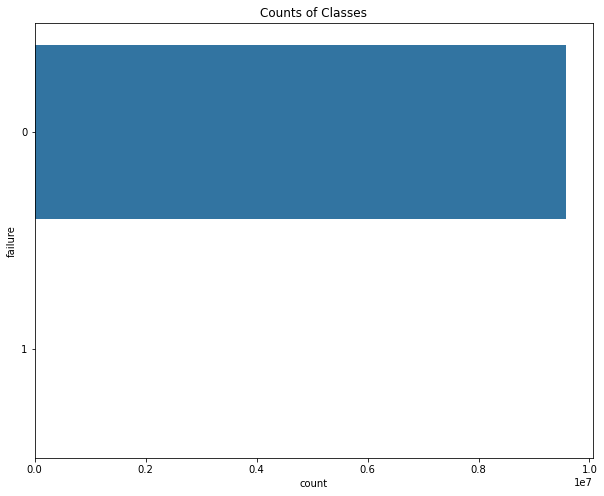

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y = 'failure',  data = df1)
plt.title('Counts of Classes')
plt.show()

### Counts of Model

In [ ]:
df1['model'].value_counts()

ST12000NM0007                          2955025
ST4000DM000                            1989429
ST8000NM0055                           1294451
HGST HMS5C4040BLE640                   1172824
ST8000DM002                             888741
HGST HMS5C4040ALE640                    313383
HGST HUH721212ALN604                    259749
ST6000DX000                             135832
TOSHIBA MG07ACA14TA                     109404
ST10000NM0086                           108555
HGST HUH728080ALE600                     93598
ST500LM012 HN                            50619
TOSHIBA MQ01ABF050                       46969
TOSHIBA MQ01ABF050M                      32624
WDC WD60EFRX                             30523
WDC WD5000LPVX                           22015
ST500LM030                               14479
HGST HUH721212ALE600                     14040
TOSHIBA MD04ABA400V                      12662
WDC WD5000LPCX                            4920
ST4000DM005                               4848
TOSHIBA MD04A

### Counts of Models by failure

In [ ]:
df1.groupby(['model', 'failure']).size().unstack(fill_value=0)

failure,0,1
model,,
DELLBOSS VD,540,0
HGST HDS5C4040ALE630,3117,0
HGST HMS5C4040ALE640,313381,2
HGST HMS5C4040BLE640,1172813,11
HGST HMS5C4040BLE641,90,0
HGST HUH721010ALE600,1245,0
HGST HUH721212ALE600,14039,1
HGST HUH721212ALN604,259745,4
HGST HUH728080ALE600,93595,3


#### We will take specific raw SMART attributes to observe the dataset, the SMART attributes we will consider to study are as follows:
1. **SMART_5-** `Rellocated Sectors Count` : This attribute count the 'bad sector', with increase in drive rellocation this value get increase. It also used as life expentency of drive as its values increase the read/write speed decrease. Lower value is good for the drive.

2. **SMART_9-** `Power on Hours`: Count of hours in power-on state. This attribute shows total count of hours (or minutes, or seconds, depending on manufacturer) in power-on state. By default the life expectancy of hard drive is for 5-years if run 24/7 then 43800 hours. Lower is good for the drive.

3. **SAMRT_187-** `Reported Uncorrectable Errors`: The number of UNC errors, i.e. read errors which Error Correction Code (ECC) failed to recover. Lower is preferd for good drive. Normally this attribute value should be equal to zero, preferd lower value.

4. **SMART_188-** `Command Timeout`: The number of operations which were interrupted due to HDD timeout.

5. **SMART_193-** `Load Cycle Count or Load/Unload Cycle Count`: The number of head movement cycles between the data zone and the head parking area or a dedicated unload ramp. Lower is preferd for running drive.

6. **SMART_194-** `Temperature or Temperature Celsius`: Temperature, monitored by a sensor somewhere inside the drive. Raw value typicaly holds the actual temperature (hexadecimal) in its rightmost two digits. Lower is preferd.

7. **SAMRT_197-** `Current Pending Sector Count`: The number of unstable sectors which are waiting to be re-tested and possibly remapped. Lower is preferd.

8. **SMART_198-** `Uncorrectable Sector Count`: The number of bad sectors which were detected during offline scan of a disk. When idling, a modern disk starts to test itself, the process known as offline scan, in order to detect possible defects in rarely used surface areas. Lower is prefered for running drive.

9. **SMART_241-** `Total LBAs Written`: The total number of 512-byte sectors written during the entire lifetime of the device.

10. **SMART_242-** `Total LBAs Read`: The total number of 512-byte sectors read during the entire lifetime of the device.

## Why choose this SMART attributes and not others?

### Well there are around 62 SMART attributes present in the dataset, so we used domain knowledge to get the useful SMART attribute to build our model. Not all the SMART attribute are suggest will be useful to build our model, like SMART- 177 (Wear Range Delta). We are not considering SMART- 177 as most of the data are missing from this attribute. Also some of the above SMART attributes like SMART -5,9,187,188,197 and 198 are consider as critical attribute means that specific value may predict the drive failure.

### Blog: https://www.backblaze.com/blog/what-smart-stats-indicate-hard-drive-failures/
### Research Paper: Proactive Prediction of Hard Disk Drive Failure by Wendy Li, Ivan Suarez and Juan Camacho.

In [ ]:
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_8_normalized,smart_8_raw,smart_9_normalized,smart_9_raw,smart_10_normalized,smart_10_raw,smart_11_normalized,smart_11_raw,smart_12_normalized,smart_12_raw,smart_13_normalized,smart_13_raw,smart_15_normalized,smart_15_raw,smart_16_normalized,smart_16_raw,smart_17_normalized,smart_17_raw,smart_22_normalized,smart_22_raw,smart_23_normalized,smart_23_raw,smart_24_normalized,...,smart_201_normalized,smart_201_raw,smart_218_normalized,smart_218_raw,smart_220_normalized,smart_220_raw,smart_222_normalized,smart_222_raw,smart_223_normalized,smart_223_raw,smart_224_normalized,smart_224_raw,smart_225_normalized,smart_225_raw,smart_226_normalized,smart_226_raw,smart_231_normalized,smart_231_raw,smart_232_normalized,smart_232_raw,smart_233_normalized,smart_233_raw,smart_235_normalized,smart_235_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2019-01-01,Z305B2QN,ST4000DM000,4000787030016,0,111.0,35673128.0,NaN,NaN,91.0,0.0,100.0,12.0,100.0,0.0,84.0,291686676.0,NaN,NaN,70.0,26712.0,100.0,0.0,NaN,NaN,100.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,26461.0,100.0,4.553972e+10,100.0,1.183566e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,83.0,187116872.0,NaN,NaN,98.0,0.0,100.0,2.0,100.0,0.0,86.0,381260348.0,NaN,NaN,96.0,3753.0,100.0,0.0,NaN,NaN,100.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,3020.0,100.0,2.887057e+10,100.0,2.160959e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,73.0,19599104.0,NaN,NaN,99.0,0.0,100.0,1.0,100.0,0.0,77.0,47835449.0,NaN,NaN,100.0,792.0,100.0,0.0,NaN,NaN,100.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,670.0,100.0,6.111459e+09,100.0,7.441231e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,81.0,136943696.0,NaN,NaN,93.0,0.0,100.0,6.0,100.0,0.0,88.0,563000051.0,NaN,NaN,96.0,4356.0,100.0,0.0,NaN,NaN,100.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,4166.0,100.0,3.350759e+10,100.0,3.938334e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,134.0,103.0,100.0,436.0,100.0,8.0,100.0,0.0,100.0,0.0,113.0,42.0,98.0,16788.0,100.0,0.0,NaN,NaN,100.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Selecting useful features(columns)

In [13]:
df_set1= df[['date', 'serial_number', 'model', 'capacity_bytes', 'failure', 'smart_5_raw', 'smart_9_raw', 'smart_187_raw', 'smart_188_raw', 'smart_193_raw', 'smart_194_raw', 'smart_197_raw', 'smart_198_raw', 'smart_241_raw', 'smart_242_raw',]].compute()
df_set1.head()

,date,serial_number,model,capacity_bytes,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_241_raw,smart_242_raw
0,2019-01-01,Z305B2QN,ST4000DM000,4000787030016,0,0.0,26712.0,0.0,0.0,34169.0,20.0,0.0,0.0,4.553972e+10,1.183566e+11
1,2019-01-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,0.0,3753.0,0.0,0.0,2145.0,28.0,0.0,0.0,2.887057e+10,2.160959e+10
2,2019-01-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,0.0,792.0,0.0,0.0,363.0,34.0,0.0,0.0,6.111459e+09,7.441231e+08
3,2019-01-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,0.0,4356.0,0.0,0.0,687.0,22.0,0.0,0.0,3.350759e+10,3.938334e+10
4,2019-01-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,0.0,16788.0,NaN,NaN,183.0,31.0,0.0,0.0,NaN,NaN


In [ ]:
df_set1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9577046 entries, 0 to 106237
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   serial_number   object 
 2   model           object 
 3   capacity_bytes  int64  
 4   failure         int64  
 5   smart_5_raw     float64
 6   smart_9_raw     float64
 7   smart_187_raw   float64
 8   smart_188_raw   float64
 9   smart_193_raw   float64
 10  smart_194_raw   float64
 11  smart_197_raw   float64
 12  smart_198_raw   float64
 13  smart_241_raw   float64
 14  smart_242_raw   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 1.1+ GB


### Observing null value present in every features(columns)

In [18]:
print(df_set1.isnull().sum())
null_var= df_set1.isnull().sum()
nv= dict(null_var)
key= list(nv.keys())
val= list(nv.values())
l=len(df_set1['model'])

date                    0
serial_number           0
model                   0
capacity_bytes          0
failure                 0
smart_5_raw          3363
smart_9_raw          1534
smart_187_raw     2182118
smart_188_raw     2182118
smart_193_raw       54152
smart_194_raw        1534
smart_197_raw        3363
smart_198_raw        3363
smart_241_raw     2165267
smart_242_raw     2165267
dtype: int64


### Missing value in percentage(%)

In [19]:
v=[]
for i in val:
    res= (i/l)*100
    v.append(res)

for j in range(len(val)):
      print(key[j],':',v[j].round(2),'%')

date : 0.0 %
serial_number : 0.0 %
model : 0.0 %
capacity_bytes : 0.0 %
failure : 0.0 %
smart_5_raw : 0.04 %
smart_9_raw : 0.02 %
smart_187_raw : 22.78 %
smart_188_raw : 22.78 %
smart_193_raw : 0.57 %
smart_194_raw : 0.02 %
smart_197_raw : 0.04 %
smart_198_raw : 0.04 %
smart_241_raw : 22.61 %
smart_242_raw : 22.61 %


### Plotting the barplot for the percentage(%) of null value present in features.

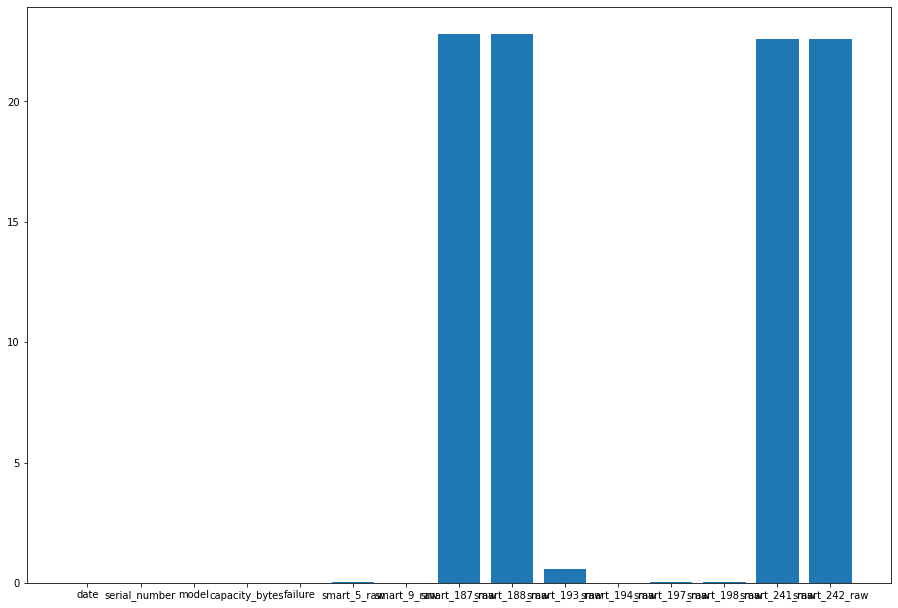

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(key,v)
plt.show()

### SMART- 187,188,241 and 242 have around 2 millions variables with null(NaN) values.

### Removing all the variables containg null values

In [ ]:
df_new= df_set1.dropna(axis=0)

In [ ]:
df_new.head()

,date,serial_number,model,capacity_bytes,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_241_raw,smart_242_raw
0,2019-01-01,Z305B2QN,ST4000DM000,4000787030016,0,0.0,26712.0,0.0,0.0,34169.0,20.0,0.0,0.0,4.553972e+10,1.183566e+11
1,2019-01-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,0.0,3753.0,0.0,0.0,2145.0,28.0,0.0,0.0,2.887057e+10,2.160959e+10
2,2019-01-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,0.0,792.0,0.0,0.0,363.0,34.0,0.0,0.0,6.111459e+09,7.441231e+08
3,2019-01-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,0.0,4356.0,0.0,0.0,687.0,22.0,0.0,0.0,3.350759e+10,3.938334e+10
5,2019-01-01,ZA16NQJR,ST8000NM0055,8001563222016,0,0.0,14673.0,0.0,0.0,15470.0,35.0,0.0,0.0,4.771906e+10,9.485711e+10


In [ ]:
df_new['failure'].value_counts()

0    7394485
1        387
Name: failure, dtype: int64

In [ ]:
df_fail= df_new[df_new['failure']==1]

In [ ]:
df_new['serial_number'].isin(df_fail['serial_number']).value_counts()

False    7377693
True       17179
Name: serial_number, dtype: int64

In [ ]:
df_feat= pd.DataFrame(df_new)
df_feat.to_csv('/content/drive/MyDrive/Colab Notebooks/Hard Drive/pre_feat.csv',index= False)

## EDA on modified dataset

### Reading the modified dataset

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hard Drive/pre_feat.csv')

In [ ]:
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_241_raw,smart_242_raw
0,2019-01-01,Z305B2QN,ST4000DM000,4000787030016,0,0.0,26712.0,0.0,0.0,34169.0,20.0,0.0,0.0,4.553972e+10,1.183566e+11
1,2019-01-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,0.0,3753.0,0.0,0.0,2145.0,28.0,0.0,0.0,2.887057e+10,2.160959e+10
2,2019-01-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,0.0,792.0,0.0,0.0,363.0,34.0,0.0,0.0,6.111459e+09,7.441231e+08
3,2019-01-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,0.0,4356.0,0.0,0.0,687.0,22.0,0.0,0.0,3.350759e+10,3.938334e+10
4,2019-01-01,ZA16NQJR,ST8000NM0055,8001563222016,0,0.0,14673.0,0.0,0.0,15470.0,35.0,0.0,0.0,4.771906e+10,9.485711e+10


In [ ]:
df.shape

(7394872, 15)

In [ ]:
df.describe()

,capacity_bytes,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_241_raw,smart_242_raw
count,7.394872e+06,7.394872e+06,7.394872e+06,7.394872e+06,7.394872e+06,7.394872e+06,7.394872e+06,7.394872e+06,7.394872e+06,7.394872e+06,7.394872e+06,7.394872e+06
mean,8.497793e+12,5.233356e-05,9.569404e+00,1.669844e+04,6.992981e-02,1.199419e+08,1.710706e+04,2.925571e+01,1.178479e-01,1.178479e-01,4.418901e+10,9.949892e+10
std,3.271565e+12,7.234005e-03,4.224026e+02,1.010813e+04,3.538332e+00,3.605010e+09,3.717816e+04,6.202526e+00,5.426524e+00,5.426524e+00,1.355657e+10,2.369858e+11
min,3.200729e+11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+03
25%,4.000787e+12,0.000000e+00,0.000000e+00,9.237000e+03,0.000000e+00,0.000000e+00,7.030000e+02,2.400000e+01,0.000000e+00,0.000000e+00,4.092971e+10,7.638332e+10
50%,8.001563e+12,0.000000e+00,0.000000e+00,1.389400e+04,0.000000e+00,0.000000e+00,5.592000e+03,2.900000e+01,0.000000e+00,0.000000e+00,4.675973e+10,1.030852e+11
75%,1.200014e+13,0.000000e+00,0.000000e+00,2.626000e+04,0.000000e+00,0.000000e+00,1.726500e+04,3.400000e+01,0.000000e+00,0.000000e+00,5.293557e+10,1.230323e+11
max,1.200014e+13,1.000000e+00,6.528800e+04,5.415700e+04,2.165000e+03,6.013057e+11,1.069436e+06,6.000000e+01,6.536000e+03,6.536000e+03,1.849923e+11,3.238815e+13


### Counting the number of times failure drives in the dataset

In [ ]:
df_fail= df[df['failure']==1]

In [ ]:
df_fail.shape

(387, 15)

In [ ]:
sn= df_fail['serial_number']

### Observing the number of times failure drives present in datset in both working and failure state.

In [ ]:
df['serial_number'].isin(df_fail['serial_number']).value_counts()

False    7377693
True       17179
Name: serial_number, dtype: int64

### So there are 7.3 million data-points from which 387 hard drive are failed(=1). The hard drive that are failed are present in data set 17,179 times(by serial_number), so there are 16,792 more times the failure hard drive are recorded but in working state in data set. We will analyze those hard drive and to know how they fail.

In [ ]:
df_main = df.loc[df['serial_number'].isin(df_fail['serial_number'])]

In [ ]:
df_main.shape

(17179, 15)

In [ ]:
df_main.head()

,date,serial_number,model,capacity_bytes,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_241_raw,smart_242_raw,capacity_tb
114,2019-01-01,Z304JN7J,ST4000DM000,4000787030016,0,0.0,28392.0,0.0,0.0,7273.0,23.0,0.0,0.0,4.796113e+10,1.341161e+11,4.000787
194,2019-01-01,ZCH05KWT,ST12000NM0007,12000138625024,0,24.0,11650.0,12.0,0.0,633.0,40.0,88.0,88.0,6.049029e+10,1.213064e+11,12.000139
297,2019-01-01,ZA16DSXV,ST8000NM0055,8001563222016,0,0.0,15892.0,0.0,0.0,14936.0,29.0,0.0,0.0,5.012936e+10,1.102447e+11,8.001563
356,2019-01-01,ZCH080T0,ST12000NM0007,12000138625024,0,0.0,10487.0,0.0,0.0,1501.0,25.0,0.0,0.0,5.349964e+10,8.614009e+10,12.000139
727,2019-01-01,ZA1890DY,ST8000NM0055,8001563222016,0,3896.0,12937.0,1.0,0.0,14353.0,38.0,0.0,0.0,4.252652e+10,1.072186e+11,8.001563


In [ ]:
df_main.describe()

,capacity_bytes,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_241_raw,smart_242_raw
count,1.717900e+04,17179.000000,17179.000000,17179.000000,17179.000000,1.717900e+04,17179.000000,17179.000000,17179.000000,17179.000000,1.717900e+04,1.717900e+04
mean,8.652945e+12,0.022528,804.697945,15973.882938,3.648524,2.197660e+08,17321.308458,30.256068,11.006811,11.006811,4.490698e+10,9.633029e+10
std,3.551614e+12,0.148396,4498.380895,9865.036605,38.141448,2.056456e+09,45749.659495,7.049839,81.808235,81.808235,1.220400e+10,4.623432e+10
min,5.001079e+11,0.000000,0.000000,80.000000,0.000000,0.000000e+00,5.000000,16.000000,0.000000,0.000000,6.049176e+08,7.389850e+06
25%,4.000787e+12,0.000000,0.000000,9073.500000,0.000000,0.000000e+00,620.000000,25.000000,0.000000,0.000000,4.156802e+10,7.576214e+10
50%,8.001563e+12,0.000000,0.000000,11888.000000,0.000000,0.000000e+00,3398.000000,29.000000,0.000000,0.000000,4.771843e+10,9.540058e+10
75%,1.200014e+13,0.000000,16.000000,26976.500000,1.000000,0.000000e+00,13775.000000,35.000000,0.000000,0.000000,5.257199e+10,1.189366e+11
max,1.200014e+13,1.000000,65288.000000,37911.000000,1723.000000,4.295033e+10,491246.000000,52.000000,6536.000000,6536.000000,6.684886e+10,3.341545e+11


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17179 entries, 114 to 7252639
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            17179 non-null  object 
 1   serial_number   17179 non-null  object 
 2   model           17179 non-null  object 
 3   capacity_bytes  17179 non-null  int64  
 4   failure         17179 non-null  int64  
 5   smart_5_raw     17179 non-null  float64
 6   smart_9_raw     17179 non-null  float64
 7   smart_187_raw   17179 non-null  float64
 8   smart_188_raw   17179 non-null  float64
 9   smart_193_raw   17179 non-null  float64
 10  smart_194_raw   17179 non-null  float64
 11  smart_197_raw   17179 non-null  float64
 12  smart_198_raw   17179 non-null  float64
 13  smart_241_raw   17179 non-null  float64
 14  smart_242_raw   17179 non-null  float64
dtypes: float64(10), int64(2), object(3)
memory usage: 2.1+ MB


### Changing the capacity from bytes to Tera bytes.

In [ ]:
df_main['capacity_tb']=df_main['capacity_bytes']/1e12

C:\Users\ayonm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Deleting the capacity_bytes columns as it is replaced by capacity_tb

In [ ]:
df_main.drop(['capacity_bytes','date'],axis=1)

,serial_number,model,failure,smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_241_raw,smart_242_raw,capacity_tb
114,Z304JN7J,ST4000DM000,0,0.0,28392.0,0.0,0.0,7273.0,23.0,0.0,0.0,4.796113e+10,1.341161e+11,4.000787
194,ZCH05KWT,ST12000NM0007,0,24.0,11650.0,12.0,0.0,633.0,40.0,88.0,88.0,6.049029e+10,1.213064e+11,12.000139
297,ZA16DSXV,ST8000NM0055,0,0.0,15892.0,0.0,0.0,14936.0,29.0,0.0,0.0,5.012936e+10,1.102447e+11,8.001563
356,ZCH080T0,ST12000NM0007,0,0.0,10487.0,0.0,0.0,1501.0,25.0,0.0,0.0,5.349964e+10,8.614009e+10,12.000139
727,ZA1890DY,ST8000NM0055,0,3896.0,12937.0,1.0,0.0,14353.0,38.0,0.0,0.0,4.252652e+10,1.072186e+11,8.001563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7203536,ZCH0CZ0N,ST12000NM0007,1,16.0,8105.0,0.0,0.0,417.0,27.0,0.0,0.0,4.858544e+10,7.428781e+10,12.000139
7204147,Z302SZLQ,ST4000DM000,1,0.0,31109.0,24.0,0.0,15311.0,27.0,64.0,64.0,5.362119e+10,1.260848e+11,4.000787
7211898,S301NGZN,ST4000DM000,1,0.0,29918.0,0.0,0.0,8232.0,21.0,16.0,16.0,4.977190e+10,1.307659e+11,4.000787
7226969,ZA17G86N,ST8000NM0055,1,418.0,13845.0,3.0,0.0,5728.0,41.0,64.0,64.0,4.393788e+10,8.475834e+10,8.001563


### Counts of Models

In [ ]:
# The counts of hard drive respect to its model
df_main['model'].value_counts()

ST12000NM0007    8177
ST4000DM000      4929
ST8000NM0055     2391
ST8000DM002      1283
ST500LM030        244
ST10000NM0086      87
ST6000DX000        65
ST8000DM004         3
Name: model, dtype: int64

### Bar plot of Counts of Models

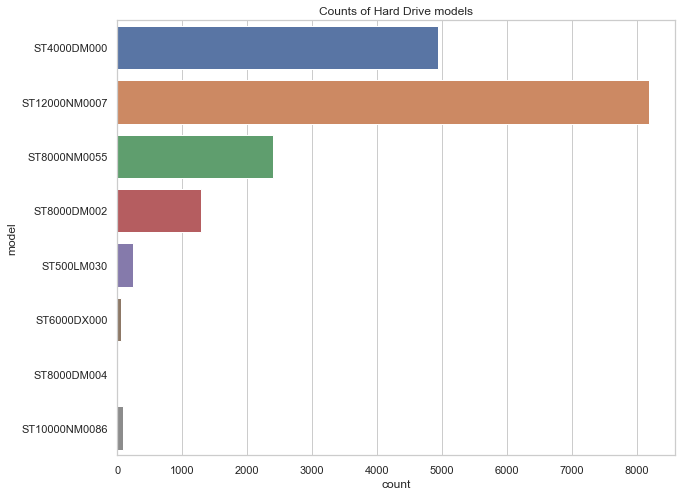

In [ ]:
#plotting counts of drive by its model
plt.figure(figsize=(10,8))
sns.set(style='whitegrid')
sns.countplot(y ='model',  data = df_main)
plt.title('Counts of Hard Drive models')
plt.show()

### Counts of Model by failure

In [ ]:
# Counts of drive by its model with respect to its failure rate
df_main.groupby(['model', 'failure']).size().unstack(fill_value=0)

failure,0,1
model,,
ST10000NM0086,84,3
ST12000NM0007,7997,180
ST4000DM000,4823,106
ST500LM030,235,9
ST6000DX000,64,1
ST8000DM002,1254,29
ST8000DM004,2,1
ST8000NM0055,2333,58


### Bar plot for Counts of Model by failure

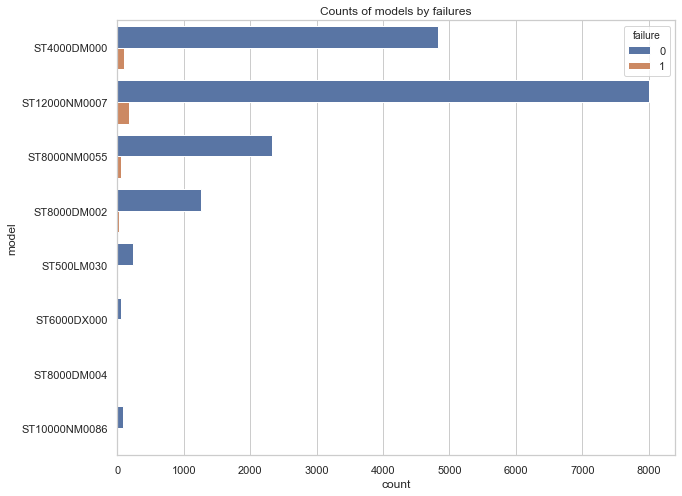

In [ ]:
#plotting of counts of drive by its model with respect to its failure.
plt.figure(figsize=(10,8))
sns.set(style='whitegrid')
sns.countplot(y='model', hue ='failure',  data = df_main)
plt.title('Counts of models by failures')
plt.show()

### Counts of Drive by capacity

In [ ]:
# Counts of drive with respect to its capacity(in TB)
df_main['capacity_tb'].value_counts()

12.000139    8177
4.000787     4929
8.001563     3677
0.500108      244
10.000831      87
6.001175       65
Name: capacity_tb, dtype: int64

### Bar plot for counts of drive by capacity

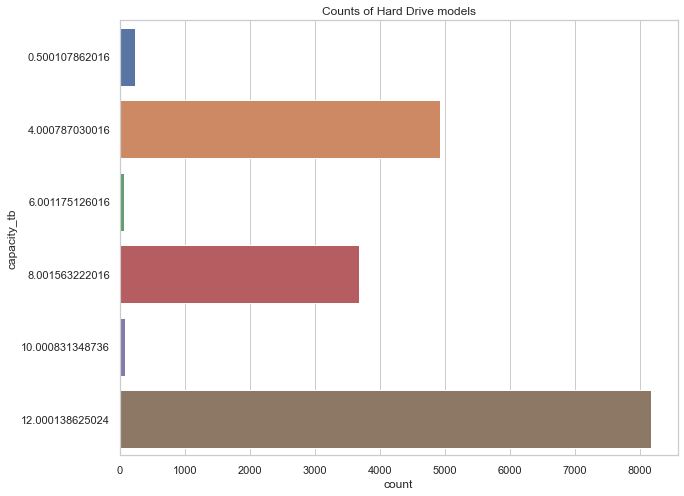

In [ ]:
#plotting counts of hard drive by its capacity
plt.figure(figsize=(10,8))
sns.set(style='whitegrid')
sns.countplot(y ='capacity_tb',  data = df_main)
plt.title('Counts of Hard Drive models')
plt.show()

### Counts of drives capacity by failure rate

In [ ]:
#Counts of capacity with respect to its failure
df_main.groupby(['capacity_tb', 'failure']).size().unstack(fill_value=0)

failure,0,1
capacity_tb,,
0.500108,235,9
4.000787,4823,106
6.001175,64,1
8.001563,3589,88
10.000831,84,3
12.000139,7997,180


### Bar plot of counts of drive capacity by failure rate

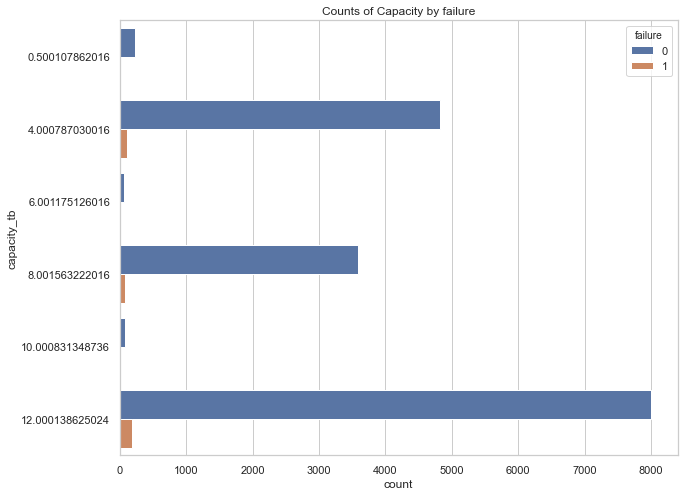

In [ ]:
#plotting counts of capacity by its failure
plt.figure(figsize=(10,8))
sns.set(style='whitegrid')
sns.countplot(y='capacity_tb', hue='failure',  data = df_main)
plt.title('Counts of Capacity by failure')
plt.show()

In [ ]:
#df_main['serial_number'].value_counts()

## Observation:
1. There are 17,179 datapoints with 16 columns(features).

2. There are 20 models of hard drive with ST12000NM0007 having maximum drive by 8177 and ST8000DM004 having minimum by 3.

3. The 90% of hard drive capacity are 12TB, 4TB and 8TB. The 47% of hard drive are 12TB capacity, 28% are 4TB and 21% are 8TB. The 12TB hard drive have shown failure 180 times and 7997 times in running, 4TB with 106 times failure and 4823 times running and 8TB with 88 times failure and 3589 times running.

4. The model ST12000NM0007 shown maximum time of failure with 180 times and appearing 7997 times more with working state.

5. The dataset is highly imbalance.

## Univariate Analysis
Univariate analysis on the data-set will help us explore a single feature. Univarient analysis includes Histogram, CDF, PFD etc..

### Distribution plot for drive capacity

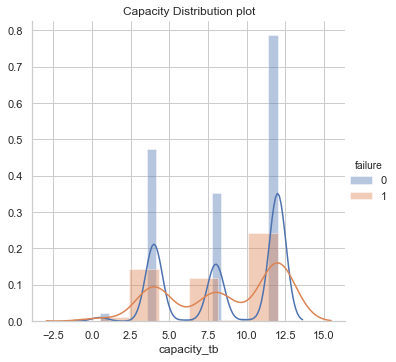

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=5) \
   .map(sns.distplot,'capacity_tb').add_legend()
plt.title('Capacity Distribution plot')
plt.show()

### Distribution plot for SMART-5

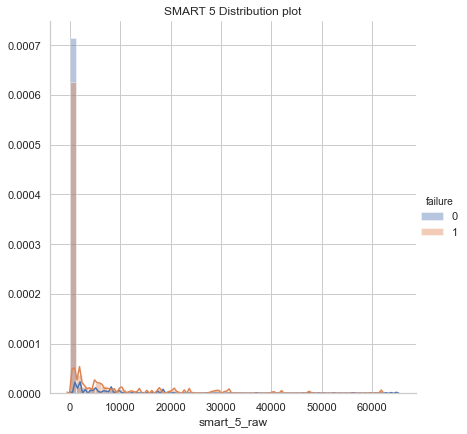

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6) \
.map(sns.distplot,'smart_5_raw').add_legend()
plt.title('SMART 5 Distribution plot')
plt.show()

### Distribution plot for SMART-9

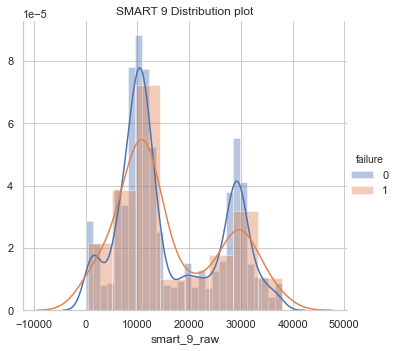

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=5) \
.map(sns.distplot,'smart_9_raw').add_legend()
plt.title('SMART 9 Distribution plot')
plt.show()

### Distribution plot for SMART-187

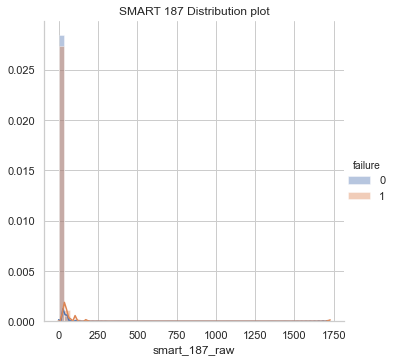

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=5) \
.map(sns.distplot,'smart_187_raw').add_legend()
plt.title('SMART 187 Distribution plot')
plt.show()

### Distribution plot for SMART-188

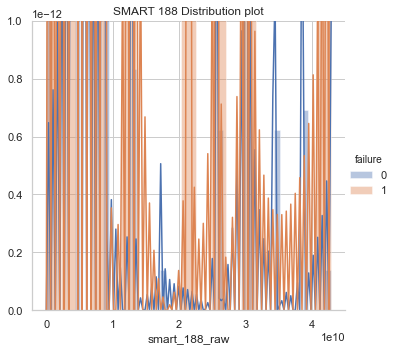

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=5) \
.map(sns.distplot,'smart_188_raw').add_legend()
plt.title('SMART 188 Distribution plot')
plt.show()

### Distribution plot for SMART- 193

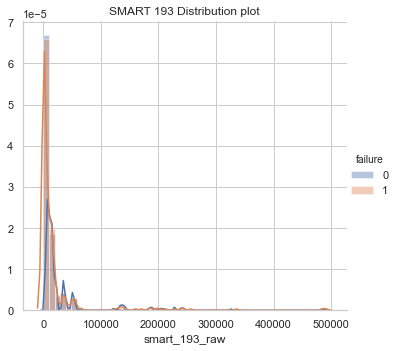

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=5) \
.map(sns.distplot,'smart_193_raw').add_legend()
plt.title('SMART 193 Distribution plot')
plt.show()

### Distribution plot for SMART-194

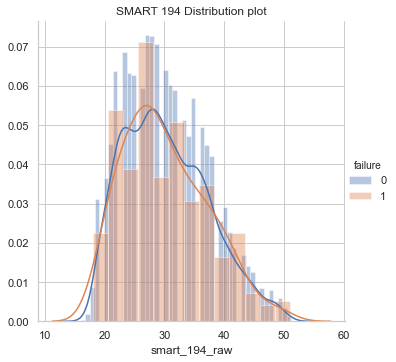

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=5) \
.map(sns.distplot,'smart_194_raw').add_legend()
plt.title('SMART 194 Distribution plot')
plt.show()

### Distribution plot for SMART-197

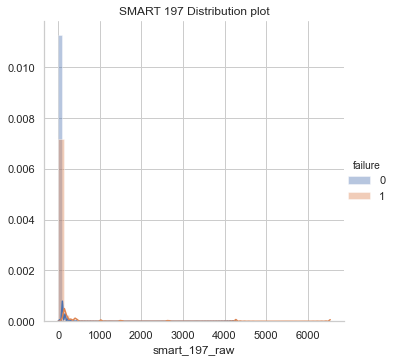

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=5) \
.map(sns.distplot,'smart_197_raw').add_legend()
plt.title('SMART 197 Distribution plot')
plt.show()

### Distribution plot for SMART-198

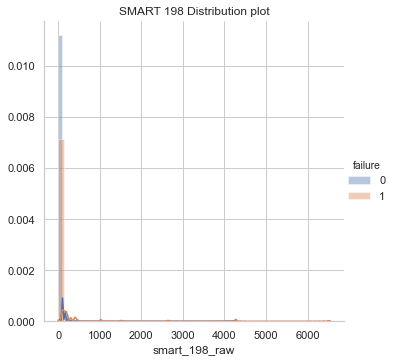

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=5) \
.map(sns.distplot,'smart_198_raw').add_legend()
plt.title('SMART 198 Distribution plot')
plt.show()

### Distribution plot for SMART-241

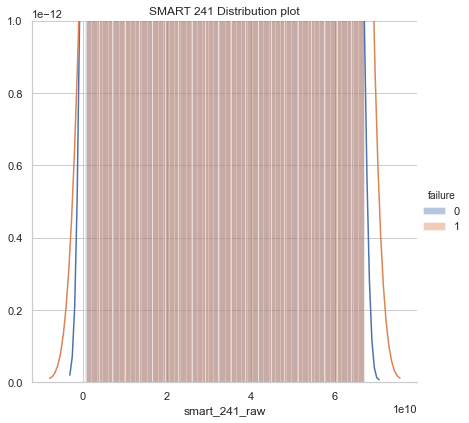

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6) \
.map(sns.distplot,'smart_241_raw').add_legend()
plt.title('SMART 241 Distribution plot')
plt.show()

### Distribution plot for SMART-242

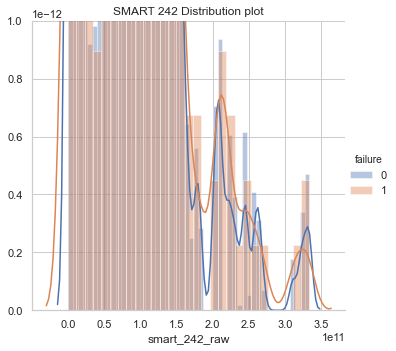

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=5) \
.map(sns.distplot,'smart_242_raw').add_legend();
plt.title('SMART 242 Distribution plot')
plt.show()

## CDF and PDF

### CDF and PDF for capacity

pdf: [0.01420339 0.         0.         0.28692008 0.00378369 0.
 0.2140404  0.         0.00506432 0.47598813]
bin edges: [ 0.50010786  1.65011094  2.80011401  3.95011709  5.10012017  6.25012324
  7.40012632  8.5501294   9.70013247 10.85013555 12.00013863]
cdf: [0.01420339 0.01420339 0.01420339 0.30112346 0.30490715 0.30490715
 0.51894755 0.51894755 0.52401187 1.        ]


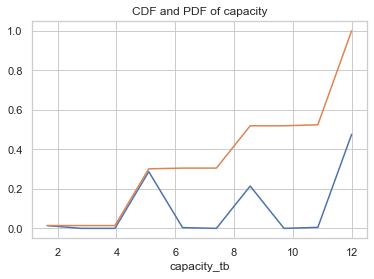

In [ ]:
#Plotting CDF and PDF 

counts, bin_edges = np.histogram(df_main['capacity_tb'], bins=10, 
                                 density = True)
plt.xlabel('capacity_tb')
pdf = counts/(sum(counts))
print("pdf:",pdf);
print("bin edges:",bin_edges);
cdf = np.cumsum(pdf)
print("cdf:",cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title('CDF and PDF of capacity')

plt.show();


### CDF and PDF for SMART-5

pdf: [9.64957215e-01 2.00244485e-02 6.51958787e-03 1.39705454e-03
 1.33884394e-03 8.73159090e-04 6.40316666e-04 1.57168636e-03
 1.57168636e-03 1.10600151e-03]
bin_edges: [    0.   6528.8 13057.6 19586.4 26115.2 32644.  39172.8 45701.6 52230.4
 58759.2 65288. ]
cdf: [0.96495722 0.98498166 0.99150125 0.99289831 0.99423715 0.99511031
 0.99575063 0.99732231 0.998894   1.        ]


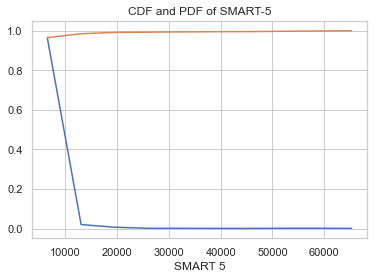

In [ ]:
#Plotting CDF and PDF 

counts, bin_edges = np.histogram(df_main['smart_5_raw'], bins=10, 
                                 density = True)
plt.xlabel('SMART 5')
pdf = counts/(sum(counts))
print("pdf:",pdf);
print("bin_edges:",bin_edges);
cdf = np.cumsum(pdf)
print("cdf:",cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('CDF and PDF of SMART-5')
plt.show();


### CDF and PDF for SMART-9

pdf: [0.07526631 0.09849235 0.29489493 0.15635369 0.03096804 0.04552069
 0.04342511 0.15728506 0.06816462 0.0296292 ]
bin edges: [   80.   3863.1  7646.2 11429.3 15212.4 18995.5 22778.6 26561.7 30344.8
 34127.9 37911. ]
cdf: [0.07526631 0.17375866 0.46865359 0.62500728 0.65597532 0.70149601
 0.74492112 0.90220618 0.9703708  1.        ]


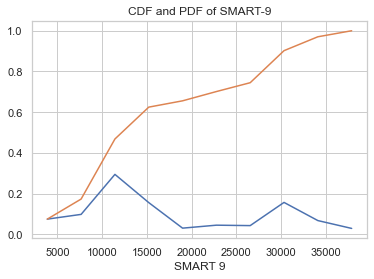

In [ ]:
#Plotting cdf and pdf


counts, bin_edges = np.histogram(df_main['smart_9_raw'], bins=10, 
                                 density = True)
plt.xlabel('SMART 9')
pdf = counts/(sum(counts))
print("pdf:",pdf);
print("bin edges:",bin_edges);
cdf = np.cumsum(pdf)
print("cdf:",cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('CDF and PDF of SMART-9')
plt.show();


### CDF and PDF for SMART-187

pdf: [9.99476105e-01 5.82106060e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.65684848e-04]
bin edges: [   0.   172.3  344.6  516.9  689.2  861.5 1033.8 1206.1 1378.4 1550.7
 1723. ]
cdf: [0.9994761  0.99953432 0.99953432 0.99953432 0.99953432 0.99953432
 0.99953432 0.99953432 0.99953432 1.        ]


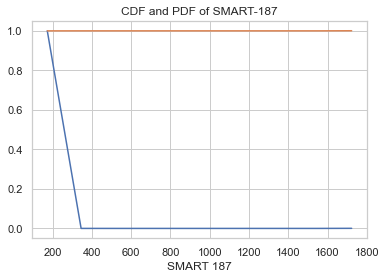

In [ ]:
#Plotting cdf and pdf


counts, bin_edges = np.histogram(df_main['smart_187_raw'], bins=10, 
                                 density = True)
plt.xlabel('SMART 187')
pdf = counts/(sum(counts))
print("pdf:",pdf);
print("bin edges:",bin_edges);
cdf = np.cumsum(pdf)
print("cdf:",cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('CDF and PDF of SMART-187')
plt.show();


### CDF and PDF for SMART-188

pdf: [9.75551545e-01 1.74631818e-02 2.61947727e-03 8.14948484e-04
 1.16421212e-04 5.82106060e-05 5.82106060e-04 1.51347576e-03
 5.23895454e-04 7.56737878e-04]
bin edges: [0.00000000e+00 4.29503283e+09 8.59006567e+09 1.28850985e+10
 1.71801313e+10 2.14751642e+10 2.57701970e+10 3.00652298e+10
 3.43602627e+10 3.86552955e+10 4.29503283e+10]
cdf: [0.97555155 0.99301473 0.9956342  0.99644915 0.99656557 0.99662378
 0.99720589 0.99871937 0.99924326 1.        ]


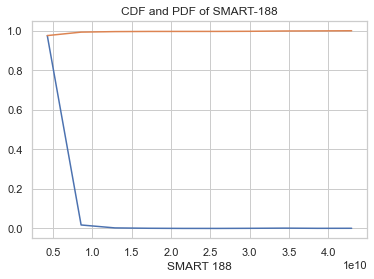

In [ ]:
#Plotting cdf and pdf


counts, bin_edges = np.histogram(df_main['smart_188_raw'], bins=10, 
                                 density = True)
plt.xlabel('SMART 188')
pdf = counts/(sum(counts))
print("pdf:",pdf);
print("bin edges:",bin_edges);
cdf = np.cumsum(pdf)
print("cdf:",cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('CDF and PDF of SMART-188')
plt.show();


### CDF and PDF for SMART-193

pdf: [9.26596426e-01 2.80575121e-02 1.68810757e-02 8.96443332e-03
 1.41451773e-02 5.82106060e-04 2.21200303e-03 0.00000000e+00
 0.00000000e+00 2.56126666e-03]
bin edges: [5.000000e+00 4.912910e+04 9.825320e+04 1.473773e+05 1.965014e+05
 2.456255e+05 2.947496e+05 3.438737e+05 3.929978e+05 4.421219e+05
 4.912460e+05]
cdf: [0.92659643 0.95465394 0.97153501 0.98049945 0.99464462 0.99522673
 0.99743873 0.99743873 0.99743873 1.        ]


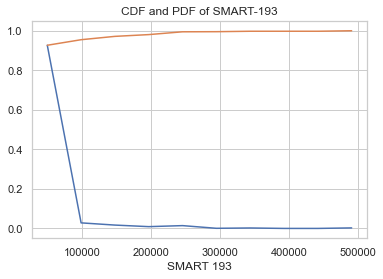

In [ ]:
#Plotting cdf and pdf


counts, bin_edges = np.histogram(df_main['smart_193_raw'], bins=10, 
                                 density = True)
plt.xlabel('SMART 193')
pdf = counts/(sum(counts))
print("pdf:",pdf);
print("bin edges:",bin_edges);
cdf = np.cumsum(pdf)
print("cdf:",cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('CDF and PDF of SMART-193')
plt.show();


### CDF and PDF for SMART-194

pdf: [0.03224868 0.16397928 0.14191746 0.21502998 0.13050818 0.15181326
 0.09191455 0.0378951  0.0263694  0.00832412]
bin edges: [16.  19.6 23.2 26.8 30.4 34.  37.6 41.2 44.8 48.4 52. ]
cdf: [0.03224868 0.19622795 0.33814541 0.55317539 0.68368357 0.83549683
 0.92741137 0.96530648 0.99167588 1.        ]


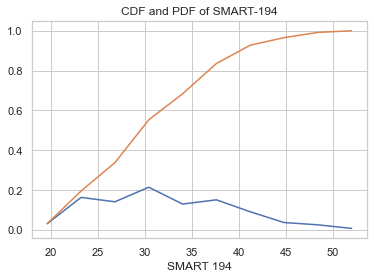

In [ ]:
#Plotting cdf and pdf


counts, bin_edges = np.histogram(df_main['smart_194_raw'], bins=10, 
                                 density = True)
plt.xlabel('SMART 194')
pdf = counts/(sum(counts))
print("pdf:",pdf);
print("bin edges:",bin_edges);
cdf = np.cumsum(pdf)
print("cdf:",cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('CDF and PDF of SMART-194')
plt.show();


### CDF and PDF for SMART-197

pdf: [9.99243262e-01 2.91053030e-04 2.32842424e-04 0.00000000e+00
 5.82106060e-05 0.00000000e+00 1.16421212e-04 0.00000000e+00
 0.00000000e+00 5.82106060e-05]
bin edges: [   0.   653.6 1307.2 1960.8 2614.4 3268.  3921.6 4575.2 5228.8 5882.4
 6536. ]
cdf: [0.99924326 0.99953432 0.99976716 0.99976716 0.99982537 0.99982537
 0.99994179 0.99994179 0.99994179 1.        ]


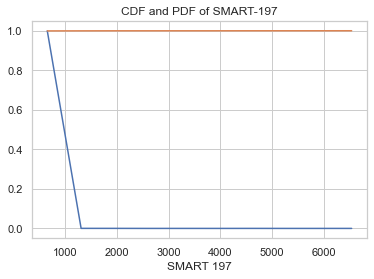

In [ ]:
#Plotting cdf and pdf


counts, bin_edges = np.histogram(df_main['smart_197_raw'], bins=10, 
                                 density = True)
plt.xlabel('SMART 197')
pdf = counts/(sum(counts))
print("pdf:",pdf);
print("bin edges:",bin_edges);
cdf = np.cumsum(pdf)
print("cdf:",cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('CDF and PDF of SMART-197')
plt.show();


### CDF and PDF for SMART-198

pdf: [9.99243262e-01 2.91053030e-04 2.32842424e-04 0.00000000e+00
 5.82106060e-05 0.00000000e+00 1.16421212e-04 0.00000000e+00
 0.00000000e+00 5.82106060e-05]
bin edges: [   0.   653.6 1307.2 1960.8 2614.4 3268.  3921.6 4575.2 5228.8 5882.4
 6536. ]
cdf: [0.99924326 0.99953432 0.99976716 0.99976716 0.99982537 0.99982537
 0.99994179 0.99994179 0.99994179 1.        ]


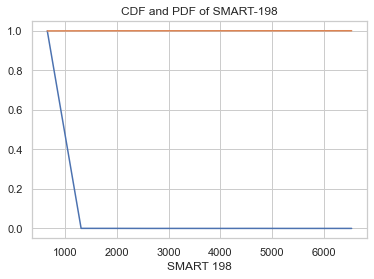

In [ ]:
#Plotting cdf and pdf


counts, bin_edges = np.histogram(df_main['smart_198_raw'], bins=10, 
                                 density = True)
plt.xlabel('SMART 198')
pdf = counts/(sum(counts))
print("pdf:",pdf);
print("bin edges:",bin_edges);
cdf = np.cumsum(pdf)
print("cdf:",cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('CDF and PDF of SMART-198')
plt.show();


### CDF and PDF for SMART-241

pdf: [0.01915129 0.02008266 0.02223645 0.0472088  0.03376215 0.06781536
 0.25694161 0.32498981 0.17567961 0.03213225]
bin edges: [6.04917552e+08 7.22931140e+09 1.38537052e+10 2.04780991e+10
 2.71024929e+10 3.37268868e+10 4.03512806e+10 4.69756745e+10
 5.36000683e+10 6.02244621e+10 6.68488560e+10]
cdf: [0.01915129 0.03923395 0.0614704  0.1086792  0.14244135 0.21025671
 0.46719832 0.79218814 0.96786775 1.        ]


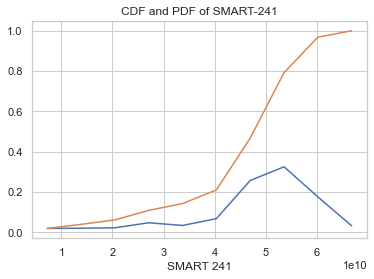

In [ ]:
#Plotting cdf and pdf


counts, bin_edges = np.histogram(df_main['smart_241_raw'], bins=10, 
                                 density = True)
plt.xlabel('SMART 241')
pdf = counts/(sum(counts))
print("pdf:",pdf);
print("bin edges:",bin_edges);
cdf = np.cumsum(pdf)
print("cdf:",cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('CDF and PDF of SMART-241')
plt.show();


### CDF and PDF for SMART-242

pdf: [0.20381232 0.1001618  0.30948529 0.28774396 0.0625948  0.00637071
 0.01542118 0.00819092 0.00045505 0.00576398]
bin edges: [0.00000000e+00 3.34154482e+10 6.68308964e+10 1.00246345e+11
 1.33661793e+11 1.67077241e+11 2.00492689e+11 2.33908137e+11
 2.67323586e+11 3.00739034e+11 3.34154482e+11]
cdf: [0.20381232 0.30397411 0.6134594  0.90120336 0.96379816 0.97016887
 0.98559005 0.99378097 0.99423602 1.        ]


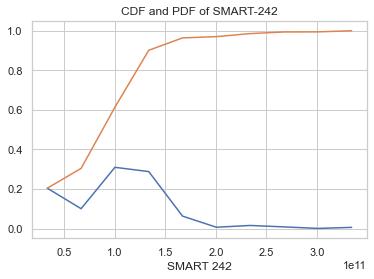

In [ ]:
#Plotting cdf and pdf


counts, bin_edges = np.histogram(df_main['smart_242_raw'], bins=10, 
                                 density = True)
plt.xlabel('SMART 242')
pdf = counts/(sum(counts))
print("pdf:",pdf);
print("bin edges:",bin_edges);
cdf = np.cumsum(pdf)
print("cdf:",cdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.title('CDF and PDF of SMART-242')
plt.show();


## Mean, Median, Standard Deviation, Quantiles and 90th Percentile

In [ ]:
print("capacity in TB:")
print("The mean:",np.mean(df_main['capacity_tb']))
print("The median:",np.median(df_main['capacity_tb']))
print("The stadard deviation:",np.std(df_main['capacity_tb']))
print("The Quantiles:",np.percentile(df_main["capacity_tb"],np.arange(0, 100, 25)))
#print("The 90th percentile:",np.percentile(df_main["capacity_tb"],90))
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(df_main['capacity_tb'],90+i))
print('-------------------------------------------------------------------------')

print("SMART 5:")
print("The mean:",np.mean(df_main['smart_5_raw']))
print("The median:",np.median(df_main['smart_5_raw']))
print("The stadard deviation:",np.std(df_main['smart_5_raw']))
print("The Quantiles:",np.percentile(df_main["smart_5_raw"],np.arange(0, 100, 25)))
#print("The 90th percentile:",np.percentile(df_main["smart_5_raw"],90))
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(df_main['smart_5_raw'],90+i))
print('-------------------------------------------------------------------------')

print("SMART 9:")
print("The mean:",np.mean(df_main['smart_9_raw']))
print("The median:",np.median(df_main['smart_9_raw']))
print("The stadard deviation:",np.std(df_main['smart_9_raw']))
print("The Quantiles:",np.percentile(df_main["smart_9_raw"],np.arange(0, 100, 25)))
#print("The 90th percentile:",np.percentile(df_main["smart_9_raw"],90))
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(df_main['smart_9_raw'],90+i))
print('-------------------------------------------------------------------------')

print("SMART 187:")
print("The mean:",np.mean(df_main['smart_187_raw']))
print("The median:",np.median(df_main['smart_187_raw']))
print("The stadard deviation:",np.std(df_main['smart_187_raw']))
print("The Quantiles:",np.percentile(df_main["smart_187_raw"],np.arange(0, 100, 25)))
#print("The 90th percentile:",np.percentile(df_main["smart_187_raw"],90))
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(df_main['smart_187_raw'],90+i))
    
print('-------------------------------------------------------------------------')

print("SMART 188:")
print("The mean:",np.mean(df_main['smart_188_raw']))
print("The median:",np.median(df_main['smart_188_raw']))
print("The stadard deviation:",np.std(df_main['smart_188_raw']))
print("The Quantiles:",np.percentile(df_main["smart_188_raw"],np.arange(0, 100, 25)))
#print("The 90th percentile:",np.percentile(df_main["smart_188_raw"],90))
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(df_main['smart_188_raw'],90+i))
    
print('-------------------------------------------------------------------------')

print("SMART 193:")
print("The mean:",np.mean(df_main['smart_193_raw']))
print("The median:",np.median(df_main['smart_193_raw']))
print("The stadard deviation:",np.std(df_main['smart_193_raw']))
print("The Quantiles:",np.percentile(df_main["smart_193_raw"],np.arange(0, 100, 25)))
#print("The 90th percentile:",np.percentile(df_main["smart_193_raw"],90))
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(df_main['smart_193_raw'],90+i))
    
print('-------------------------------------------------------------------------')

print("SMART 194:")
print("The mean:",np.mean(df_main['smart_194_raw']))
print("The median:",np.median(df_main['smart_194_raw']))
print("The stadard deviation:",np.std(df_main['smart_194_raw']))
print("The Quantiles:",np.percentile(df_main["smart_194_raw"],np.arange(0, 100, 25)))
#print("The 90th percentile:",np.percentile(df_main["smart_194_raw"],90))
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(df_main['smart_194_raw'],90+i))
    
print('-------------------------------------------------------------------------')

print("SMART 197:")
print("The mean:",np.mean(df_main['smart_197_raw']))
print("The median:",np.median(df_main['smart_197_raw']))
print("The stadard deviation:",np.std(df_main['smart_197_raw']))
print("The Quantiles:",np.percentile(df_main["smart_197_raw"],np.arange(0, 100, 25)))
#print("The 90th percentile:",np.percentile(df_main["smart_197_raw"],90))
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(df_main['smart_197_raw'],90+i))

print('-------------------------------------------------------------------------')

print("SMART 198:")
print("The mean:",np.mean(df_main['smart_198_raw']))
print("The median:",np.median(df_main['smart_198_raw']))
print("The stadard deviation:",np.std(df_main['smart_198_raw']))
print("The Quantiles:",np.percentile(df_main["smart_198_raw"],np.arange(0, 100, 25)))
#print("The 90th percentile:",np.percentile(df_main["smart_198_raw"],90))
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(df_main['smart_198_raw'],90+i))

print('-------------------------------------------------------------------------')

print("SMART 241:")
print("The mean:",np.mean(df_main['smart_241_raw']))
print("The median:",np.median(df_main['smart_241_raw']))
print("The stadard deviation:",np.std(df_main['smart_241_raw']))
print("The Quantiles:",np.percentile(df_main["smart_241_raw"],np.arange(0, 100, 25)))
#print("The 90th percentile:",np.percentile(df_main["smart_241_raw"],90))
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(df_main['smart_241_raw'],90+i))

print('-------------------------------------------------------------------------')

print("SMART 242:")
print("The mean:",np.mean(df_main['smart_242_raw']))
print("The median:",np.median(df_main['smart_242_raw']))
print("The stadard deviation:",np.std(df_main['smart_242_raw']))
print("The Quantiles:",np.percentile(df_main["smart_242_raw"],np.arange(0, 100, 25)))
#print("The 90th percentile:",np.percentile(df_main["smart_242_raw"],90))
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(df_main['smart_242_raw'],90+i))

capacity in TB:
The mean: 8.652944630303491
The median: 8.001563222016
The stadard deviation: 3.5515102847532516
The Quantiles: [ 0.50010786  4.00078703  8.00156322 12.00013863]
90 percentile value is 12.000138625024
91 percentile value is 12.000138625024
92 percentile value is 12.000138625024
93 percentile value is 12.000138625024
94 percentile value is 12.000138625024
95 percentile value is 12.000138625024
96 percentile value is 12.000138625024
97 percentile value is 12.000138625024
98 percentile value is 12.000138625024
99 percentile value is 12.000138625024
100 percentile value is 12.000138625024
-------------------------------------------------------------------------
SMART 5:
The mean: 804.6979451656092
The median: 0.0
The stadard deviation: 4498.249966671218
The Quantiles: [ 0.  0.  0. 16.]
90 percentile value is 432.0
91 percentile value is 560.0
92 percentile value is 1088.0
93 percentile value is 1440.0
94 percentile value is 2016.0
95 percentile value is 3906.399999999965
96

## Observation of Univariate Analysis:

### We dont see proper separation between failure and working drives from the histogram of the above Univariate Analysis

#### 1. Capacity: 30% of hard drive are between 4 to 6TB , 21% are 8TB and 47% are in 12 TB, as we have also observe in the drive capacity counts. So around 53% of drive in dataset are all within 10TB.

#### 2. SMART-5: Around 95% of variables are within 10000.

#### 3. SMART-9: Around 75% of variable lie within 25000.

#### 4. SMART- 187: Around 80% of variable are lie between 0 to 200 and rest goes upto 1700.

#### 5. SMART-188: Around 80% of variable are lie between 0 to 0.5 and rest goes upto 5.

#### 6. SMART-193: Around 95% of variable are lie within 100000 and rest goes upto 500000.

#### 7. SMART-194: Around 22% of variable are 27 to 34 and about 80 % of data are within 37.

#### 8. SMART-197: Around 40% of variable are between 0 to 1000 

#### 9. SMART- 198: Around 40% of variables are within 1000.

#### 10. SMART-241: Around 60% of variable are within 5x10^10.

#### 11. SMART-242: Around 80% of variable are within 1.25x10^11.

#### 12. Capacity, SMART- 9, 194, 241, 242 have very similar mean and median which means the variables are almost perfectly symmetrical distributed, whereas

#### 13. SMART- 5, 187,188,193,197,198 have not similar mean and median which means that there variables are not well distributed.

## Bivariate Analysis

### Pair-plot

C:\Users\ayonm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ayonm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ayonm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ayonm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


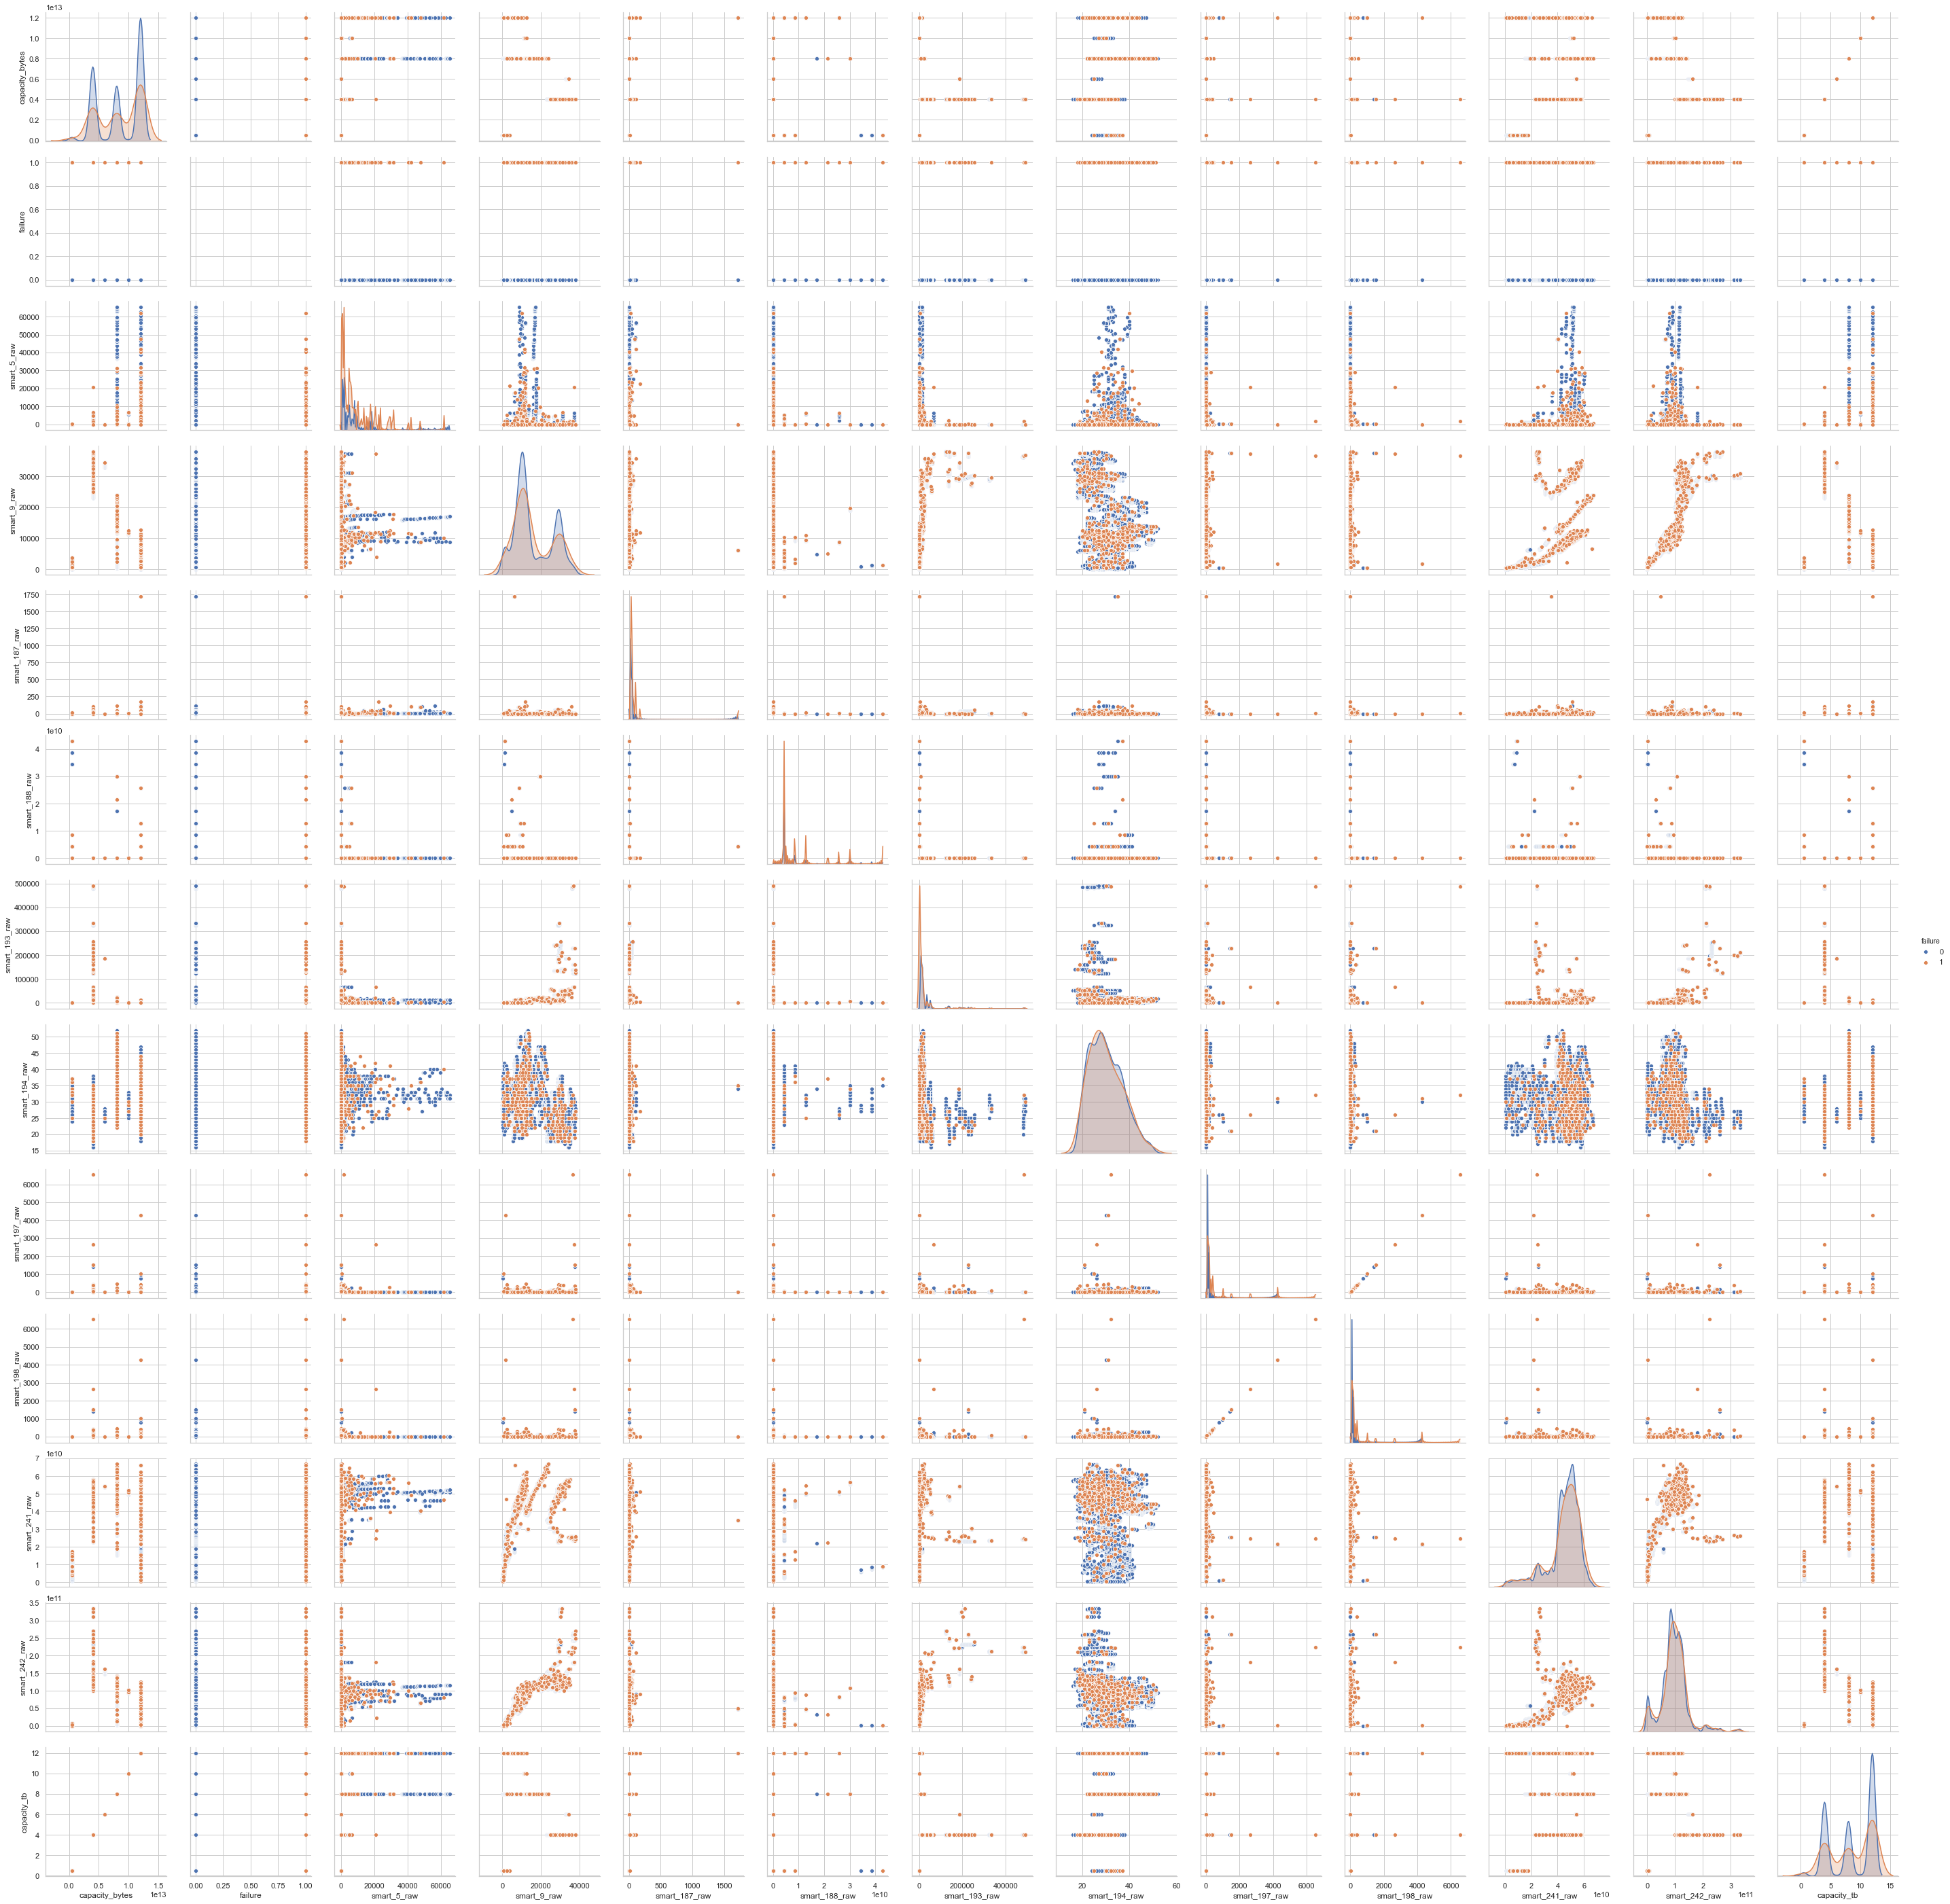

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df_main, hue="failure", height=3);
plt.show()

### We are going  to analyze all the features(capacity and SMART attributes) with reference to the model of the hard drives.

### capacity vs model

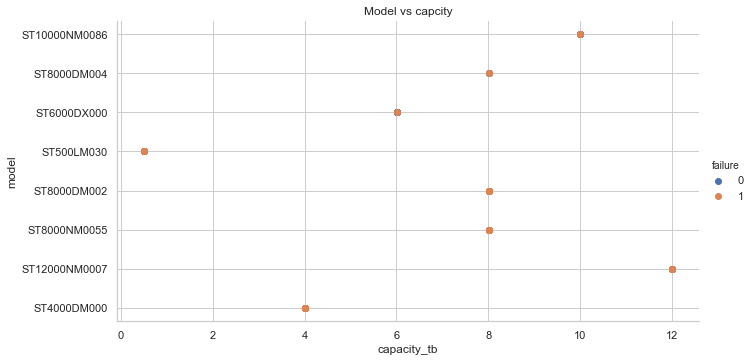

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=5,aspect=2) \
   .map(plt.scatter,'capacity_tb','model')\
   .add_legend()
plt.title('Model vs capcity')
plt.show()

### smart-5 vs model

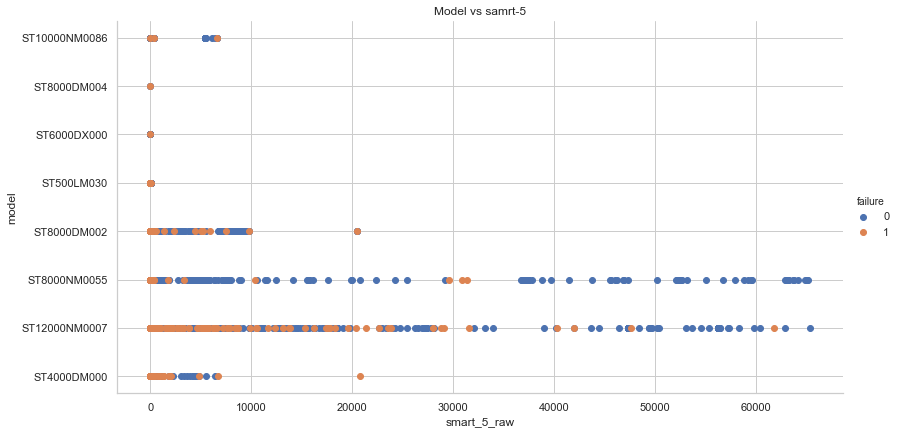

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
   .map(plt.scatter,'smart_5_raw','model')\
   .add_legend()
plt.title('Model vs samrt-5')
plt.show()

### smart-9 vs model

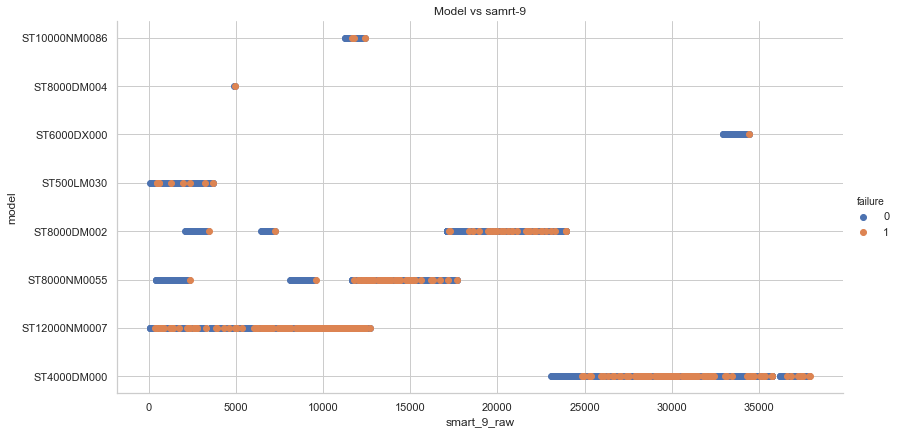

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
   .map(plt.scatter,'smart_9_raw','model')\
   .add_legend()
plt.title('Model vs samrt-9')
plt.show()

### smart-187 vs model

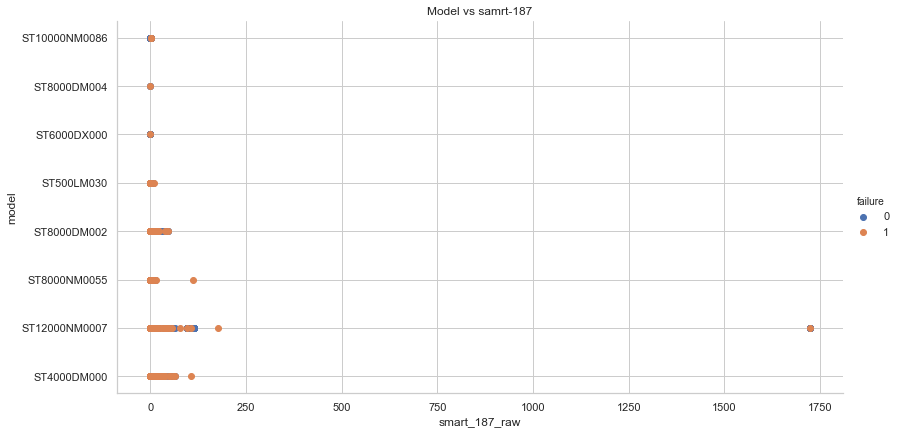

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
   .map(plt.scatter,'smart_187_raw','model')\
   .add_legend()
plt.title('Model vs samrt-187')
plt.show()

### smart-188 vs model

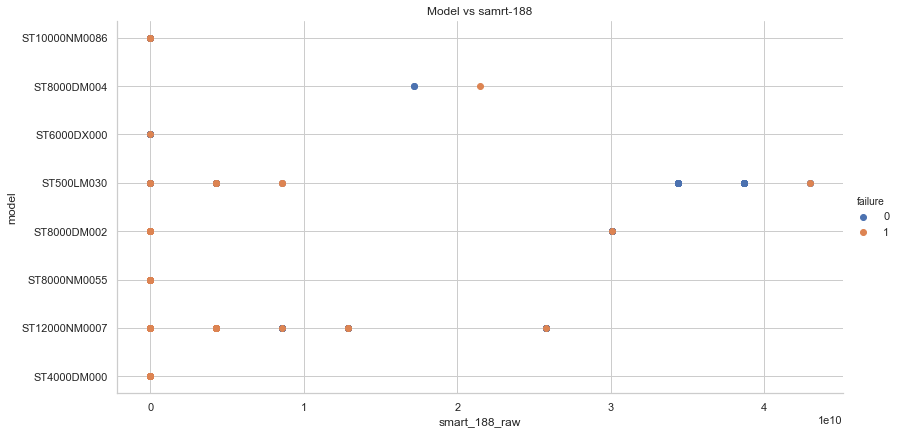

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
   .map(plt.scatter,'smart_188_raw','model')\
   .add_legend()
plt.title('Model vs samrt-188')
plt.show()

### smart-193 vs model

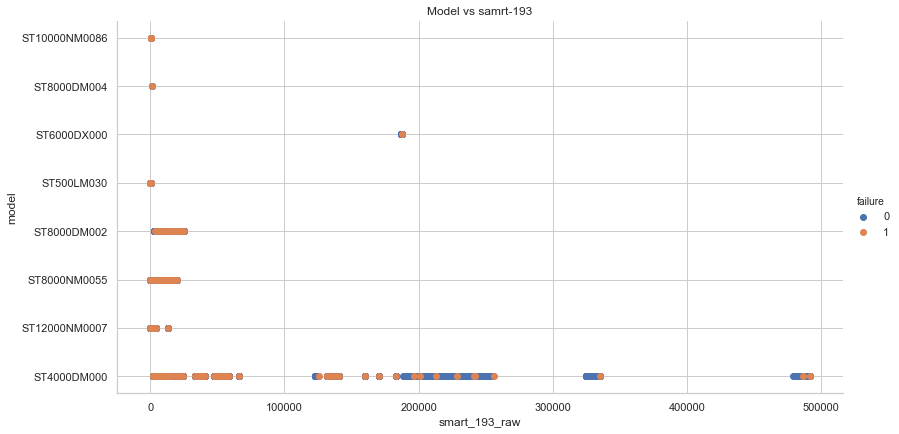

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
   .map(plt.scatter,'smart_193_raw','model')\
   .add_legend()
plt.title('Model vs samrt-193')
plt.show()

### samrt-194 vs model

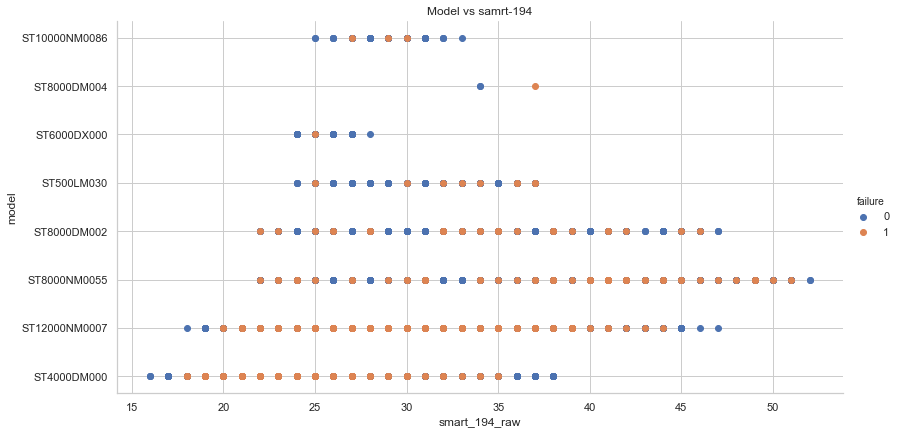

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
   .map(plt.scatter,'smart_194_raw','model')\
   .add_legend()
plt.title('Model vs samrt-194')
plt.show()

### smart-197 vs model

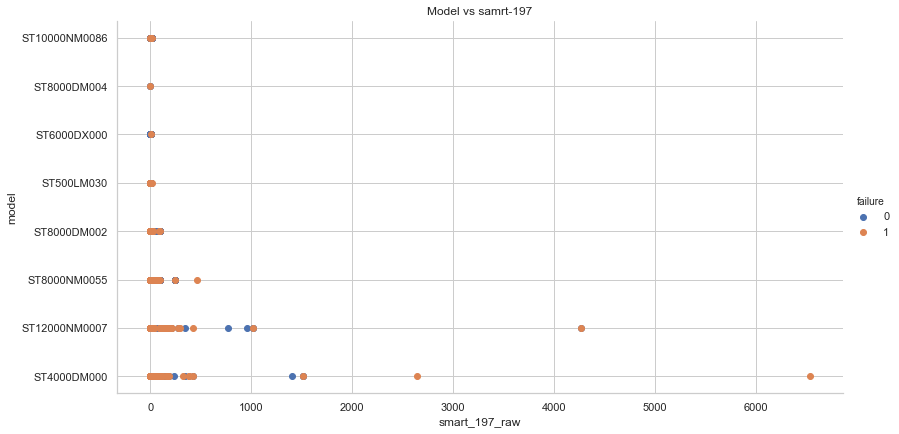

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
   .map(plt.scatter,'smart_197_raw','model')\
   .add_legend()
plt.title('Model vs samrt-197')
plt.show()

### smart- 198 vs model

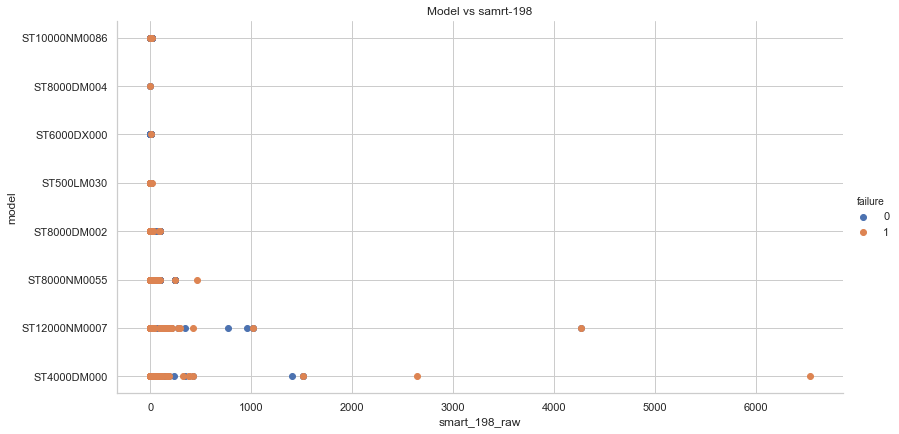

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
   .map(plt.scatter,'smart_198_raw','model')\
   .add_legend()
plt.title('Model vs samrt-198')
plt.show()

### smart-241 vs model

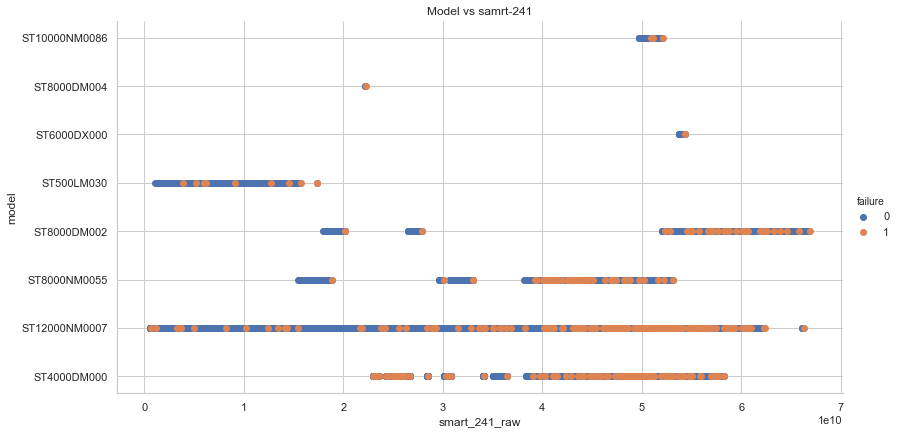

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
   .map(plt.scatter,'smart_241_raw','model')\
   .add_legend()
plt.title('Model vs samrt-241')
plt.show()

### smart- 242 vs model

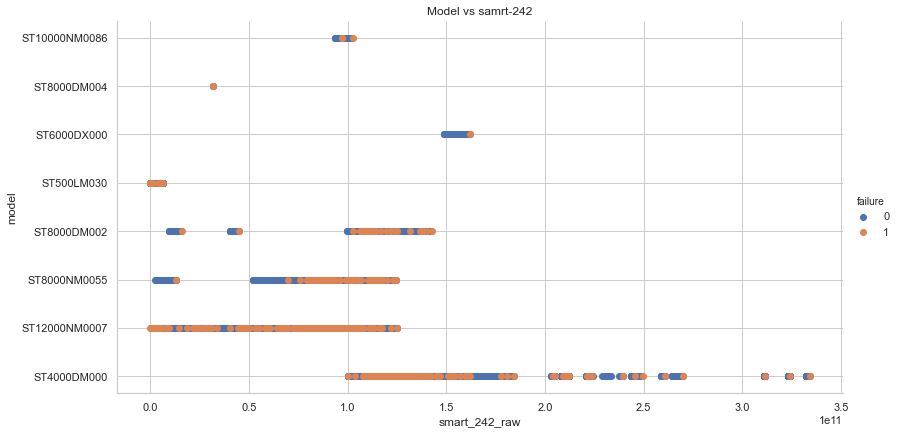

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
   .map(plt.scatter,'smart_242_raw','model')\
   .add_legend()
plt.title('Model vs samrt-242')
plt.show()

### We are going to analyze all the SMART with each other.

#### SMART-5

### smart-5 vs smart-9

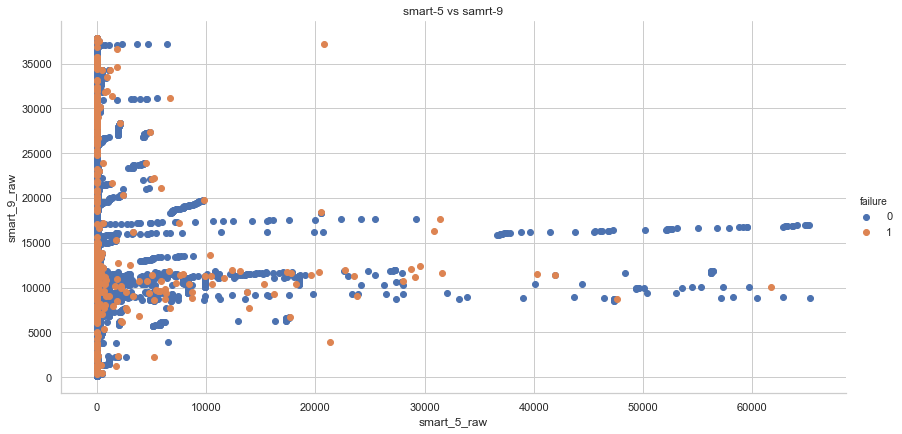

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_5_raw','smart_9_raw').add_legend()
plt.title('smart-5 vs samrt-9')
plt.show()

### smart-5 vs smart-187

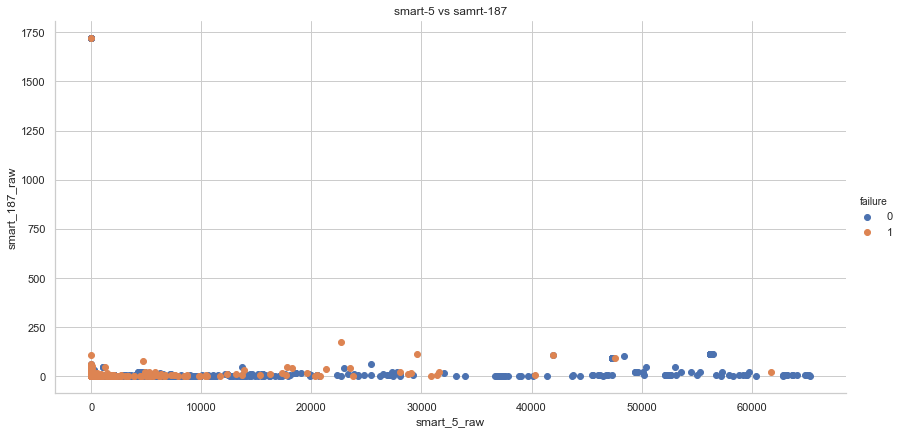

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_5_raw','smart_187_raw').add_legend()
plt.title('smart-5 vs samrt-187')
plt.show()

### smart-5 vs smart-188

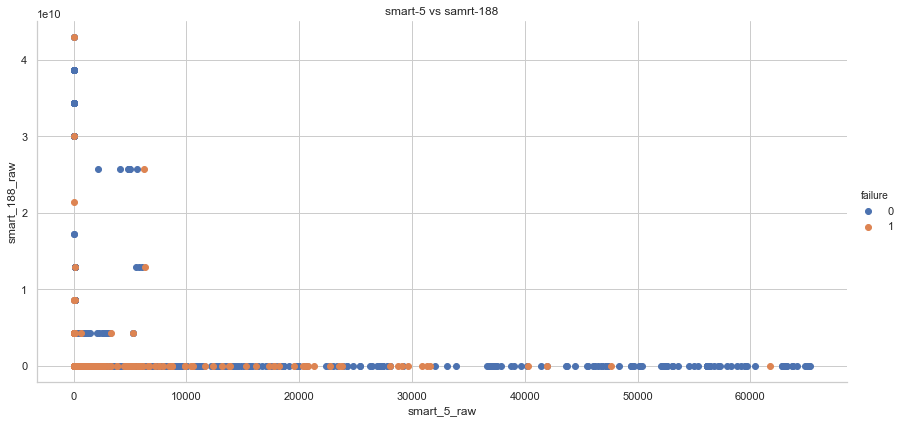

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_5_raw','smart_188_raw').add_legend()
plt.title('smart-5 vs samrt-188')
plt.show()

### smart-5 vs smart-193

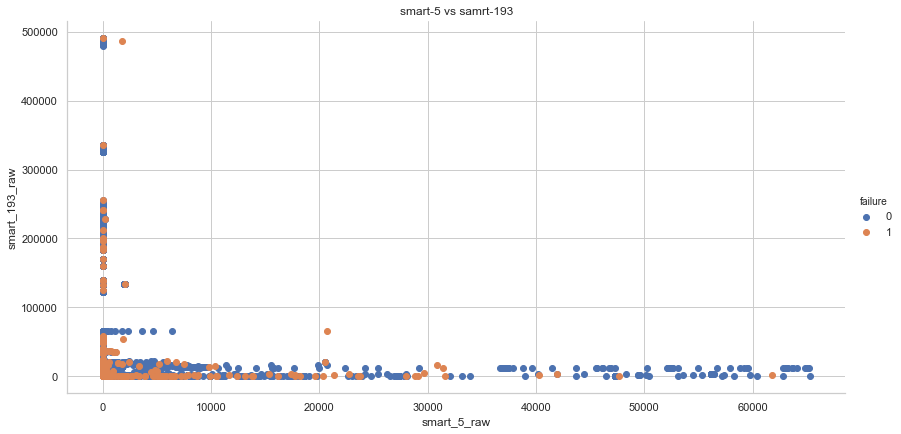

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_5_raw','smart_193_raw').add_legend()
plt.title('smart-5 vs samrt-193')
plt.show()

### smart-5 vs smart-194

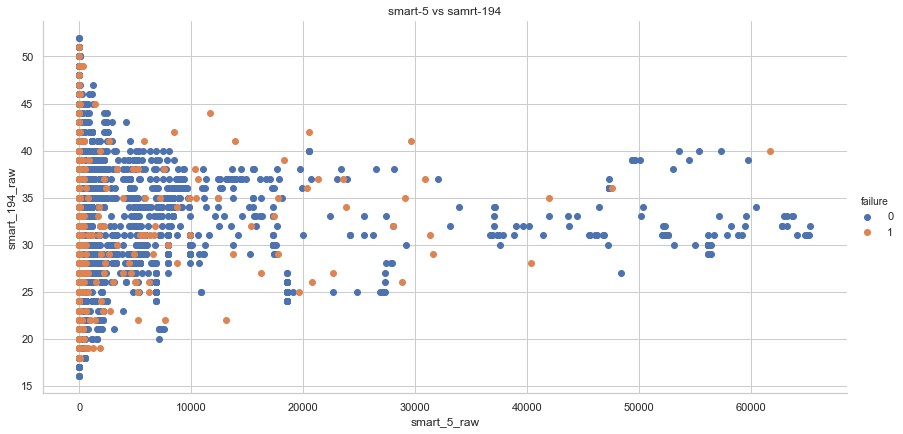

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_5_raw','smart_194_raw').add_legend()
plt.title('smart-5 vs samrt-194')
plt.show()

### smart-5 vs smart-197

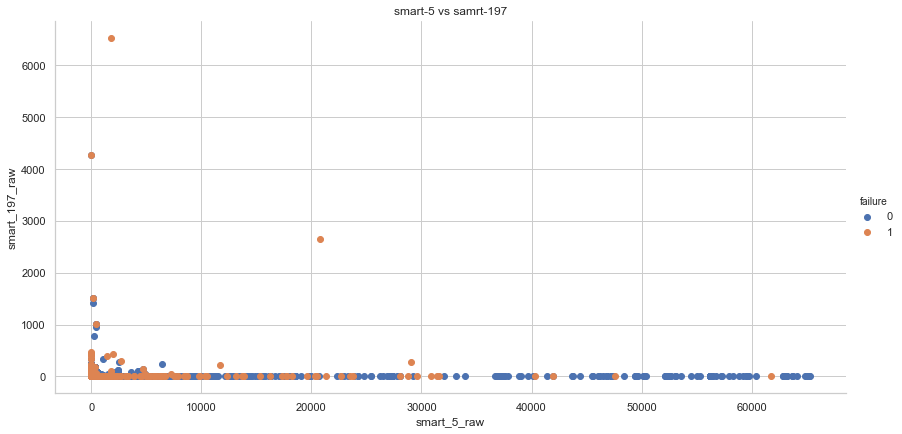

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_5_raw','smart_197_raw').add_legend()
plt.title('smart-5 vs samrt-197')
plt.show()

### smart-5 vs smart-198

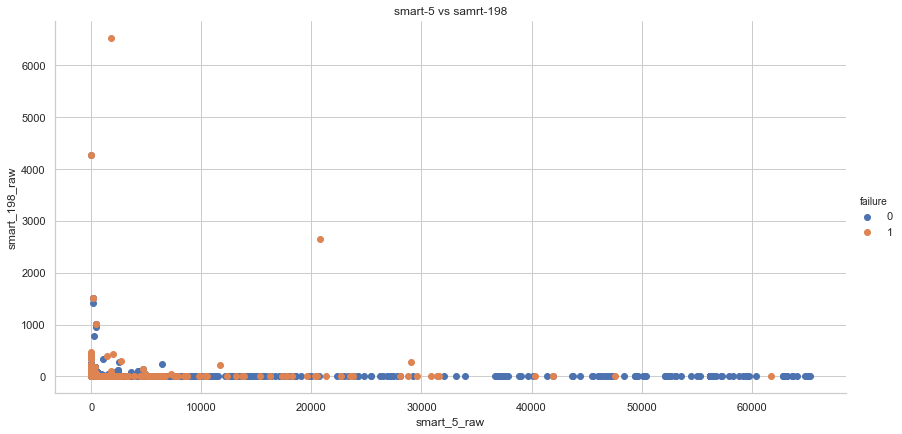

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_5_raw','smart_198_raw').add_legend()
plt.title('smart-5 vs samrt-198')
plt.show()

### smart-5 vs smart-241

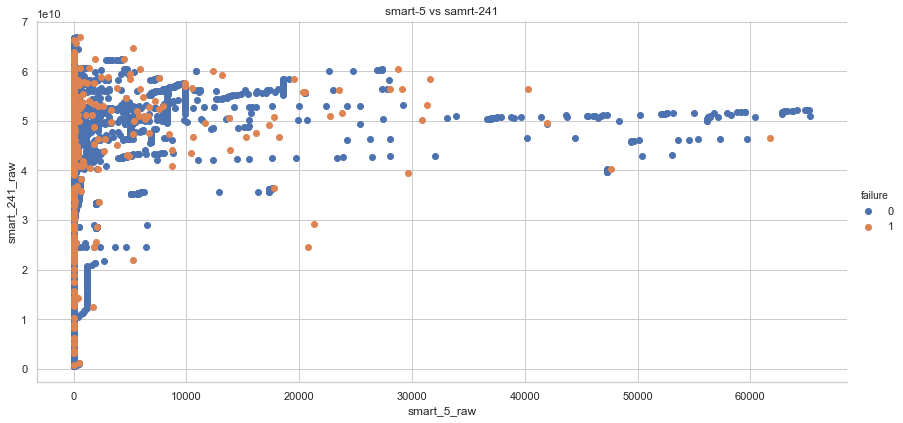

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_5_raw','smart_241_raw').add_legend()
plt.title('smart-5 vs samrt-241')
plt.show()

### smart-5 vs smart-242

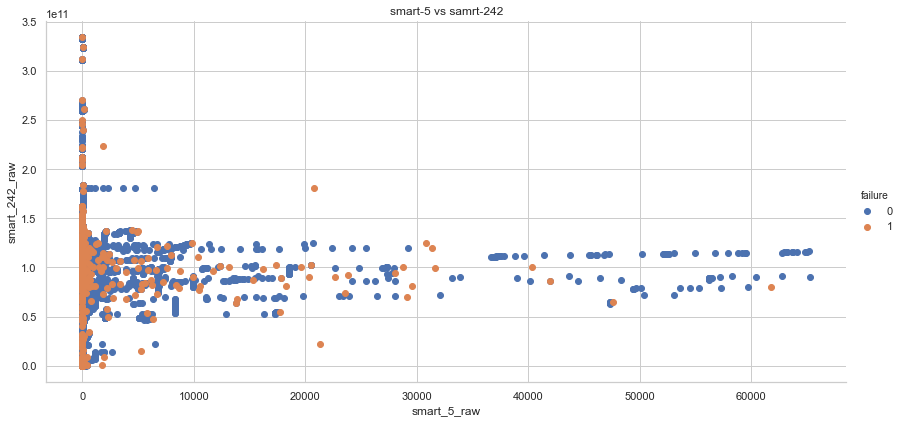

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_5_raw','smart_242_raw').add_legend()
plt.title('smart-5 vs samrt-242')
plt.show()

### SMART-9

### smart-9 vs smart-187

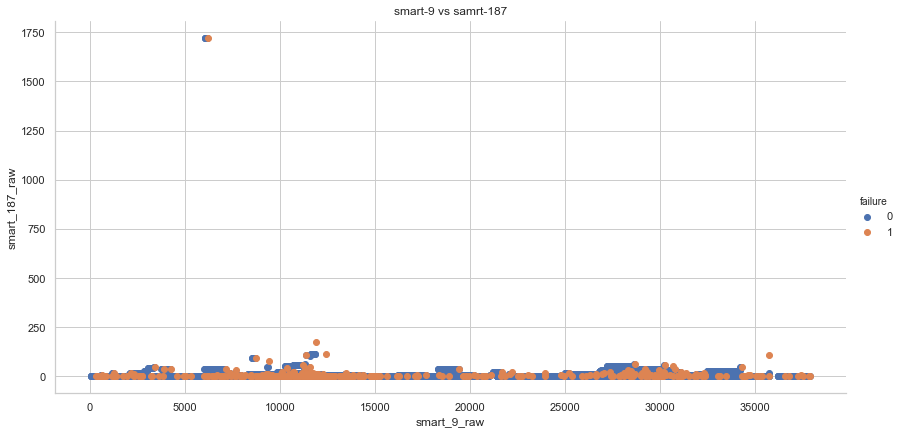

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_9_raw','smart_187_raw').add_legend()
plt.title('smart-9 vs samrt-187')
plt.show()

### smart-9 vs smart-188

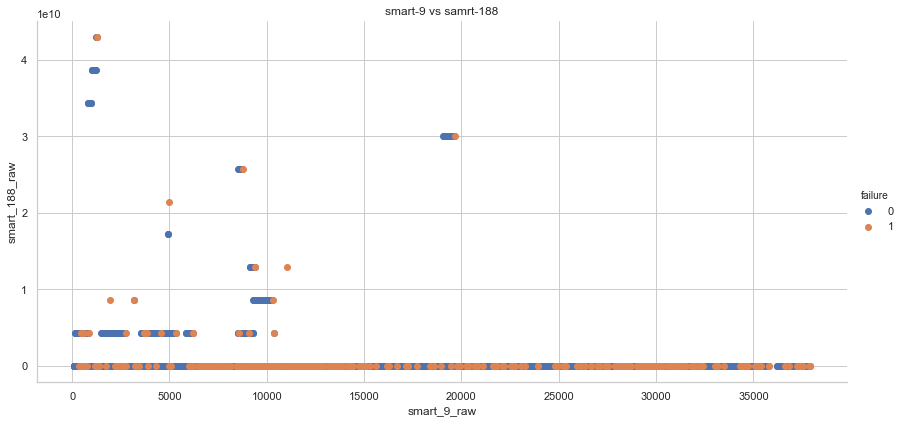

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_9_raw','smart_188_raw').add_legend()
plt.title('smart-9 vs samrt-188')
plt.show()

### smart-9 vs smart-193

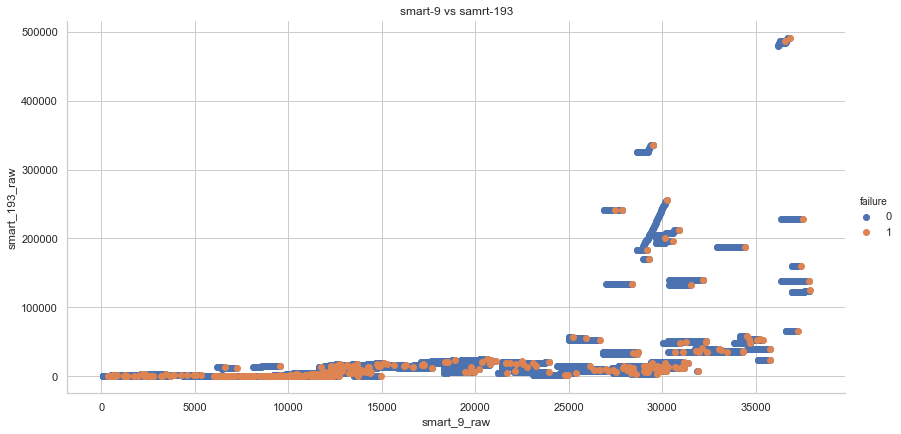

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_9_raw','smart_193_raw').add_legend()
plt.title('smart-9 vs samrt-193')
plt.show()

### smart-9 vs smart-194

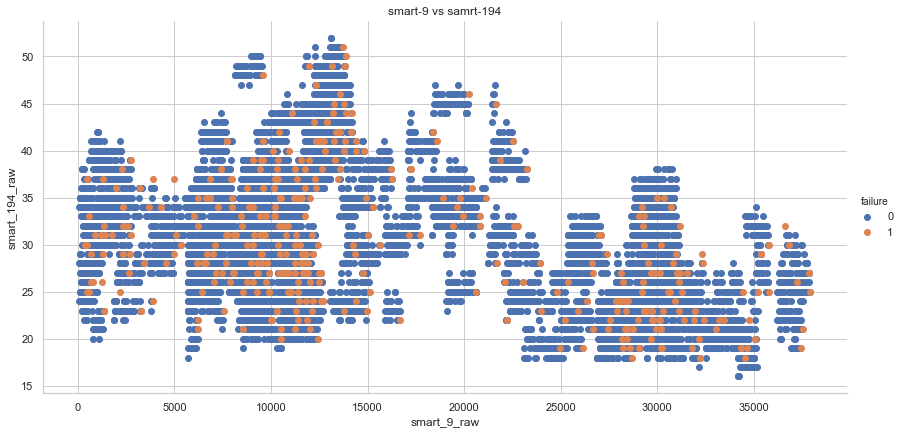

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_9_raw','smart_194_raw').add_legend()
plt.title('smart-9 vs samrt-194')
plt.show()

### smart-9 vs smart-197

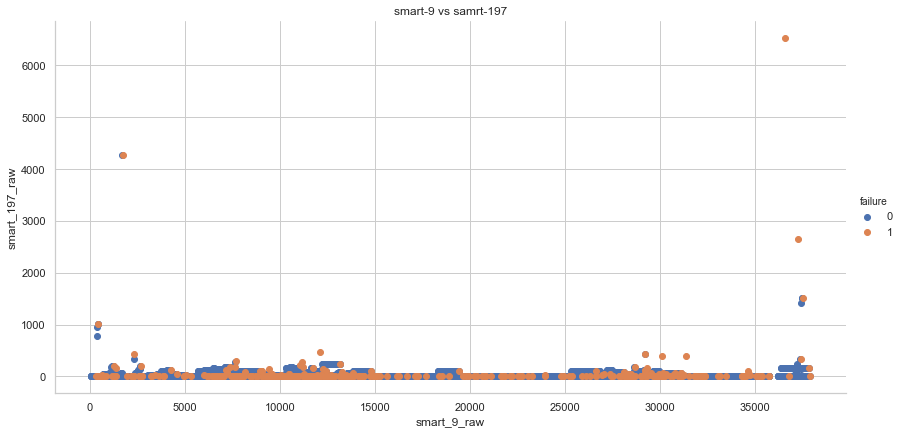

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_9_raw','smart_197_raw').add_legend()
plt.title('smart-9 vs samrt-197')
plt.show()

### smart-9 vs smart-198

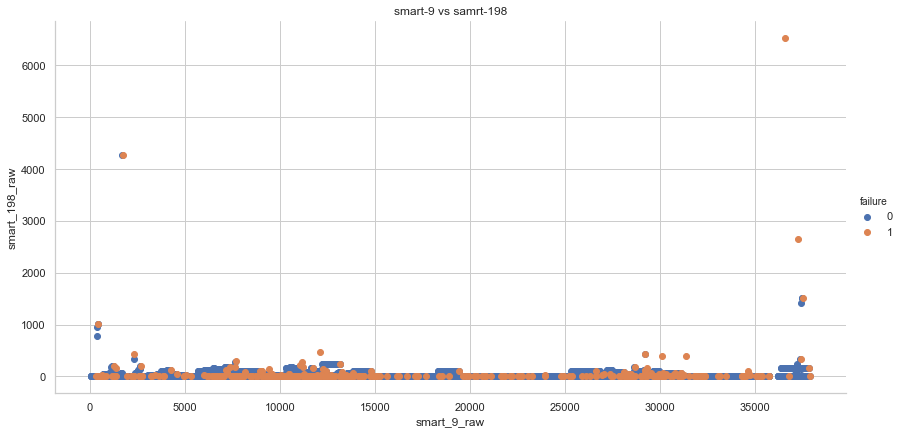

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_9_raw','smart_198_raw').add_legend()
plt.title('smart-9 vs samrt-198')
plt.show()

### smart-9 vs smart-241

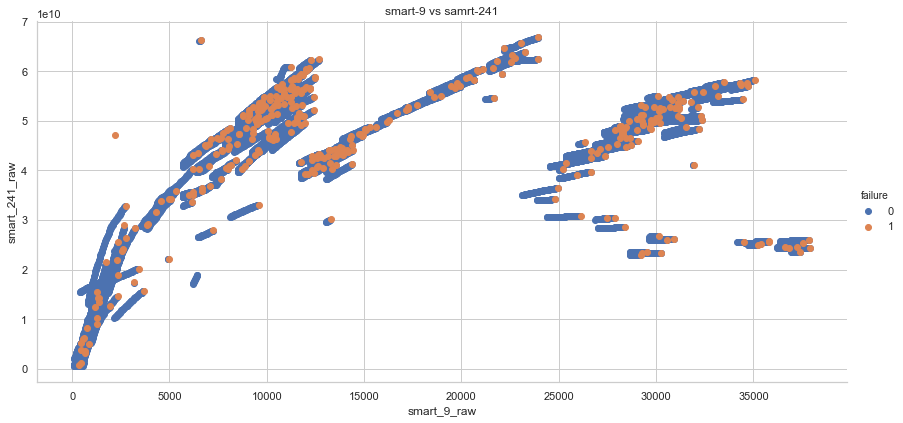

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_9_raw','smart_241_raw').add_legend()
plt.title('smart-9 vs samrt-241')
plt.show()

### smart-9 vs smart-242

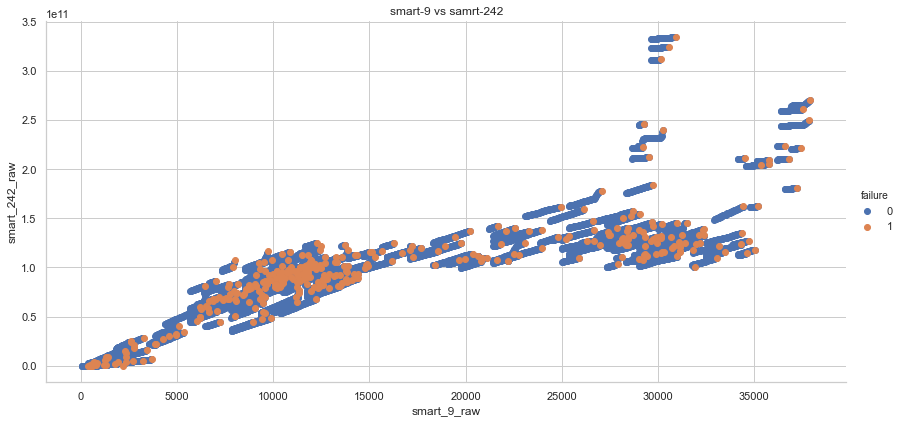

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_9_raw','smart_242_raw').add_legend()
plt.title('smart-9 vs samrt-242')
plt.show()

### SMART-187

### smart-187 vs smart-188

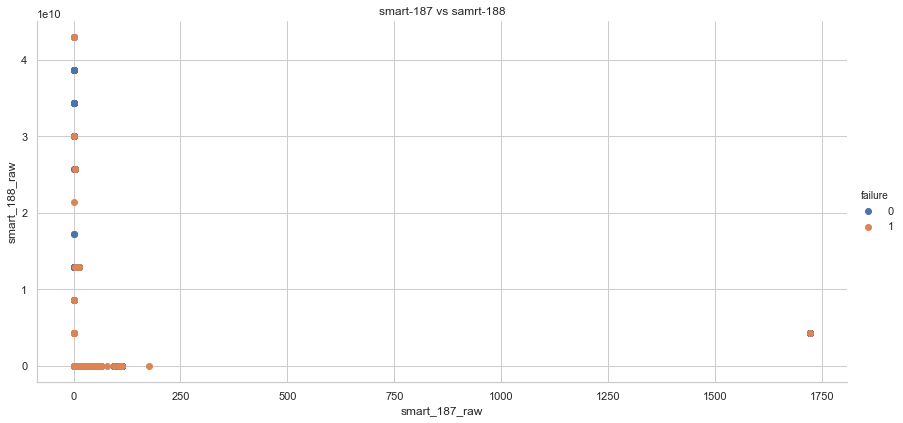

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_187_raw','smart_188_raw').add_legend()
plt.title('smart-187 vs samrt-188')
plt.show()

### smart-187 vs smart-193

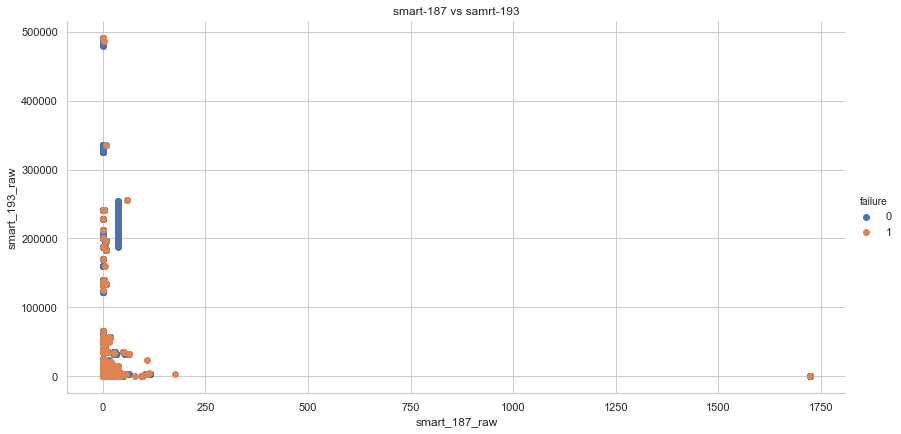

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_187_raw','smart_193_raw').add_legend()
plt.title('smart-187 vs samrt-193')
plt.show()

### smart-187 vs smart-194

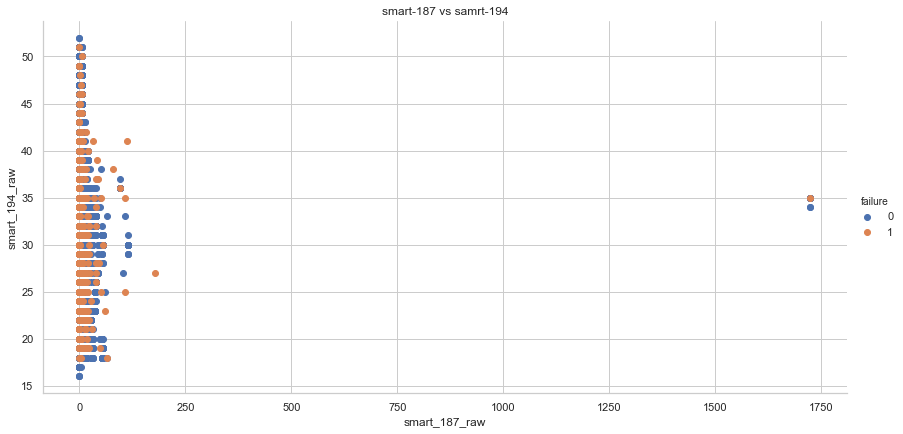

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_187_raw','smart_194_raw').add_legend()
plt.title('smart-187 vs samrt-194')
plt.show()

### smart-187 vs smart-197

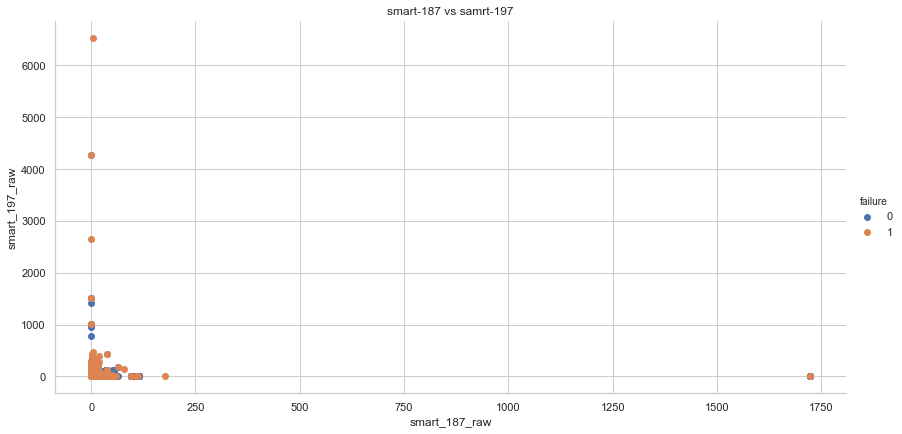

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_187_raw','smart_197_raw').add_legend()
plt.title('smart-187 vs samrt-197')
plt.show()

### smart-187 vs smart-198

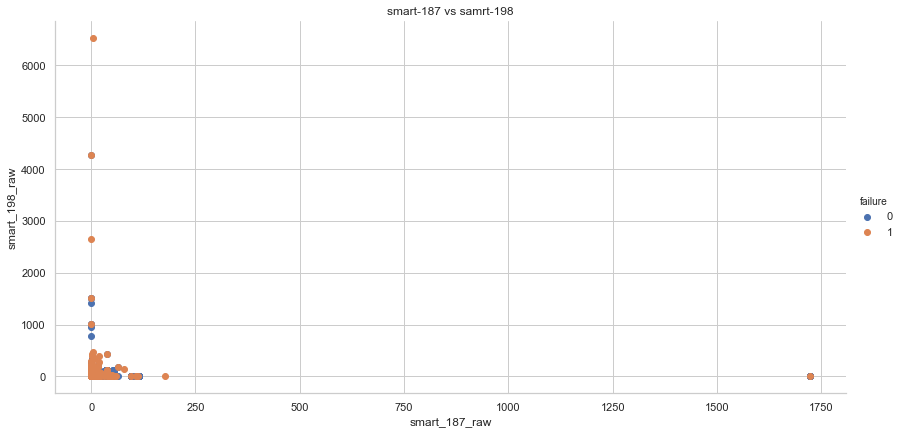

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_187_raw','smart_198_raw').add_legend()
plt.title('smart-187 vs samrt-198')
plt.show()

### smart-187 vs smart-241

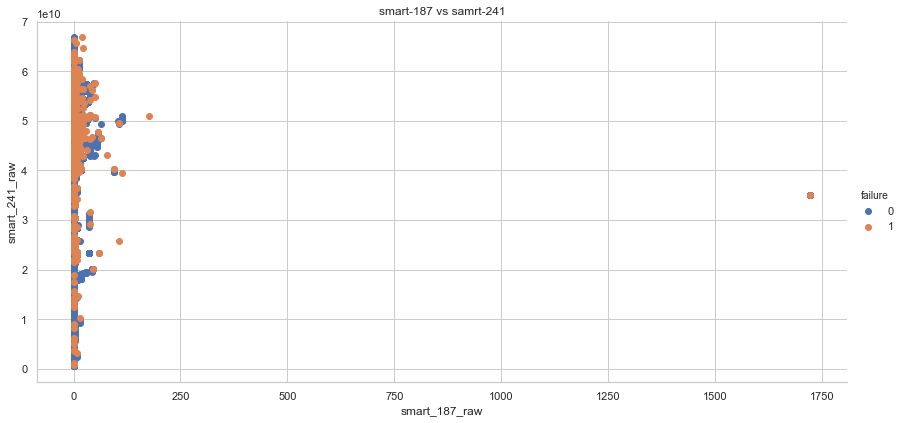

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_187_raw','smart_241_raw').add_legend()
plt.title('smart-187 vs samrt-241')
plt.show()

### smart-187 vs smart-242

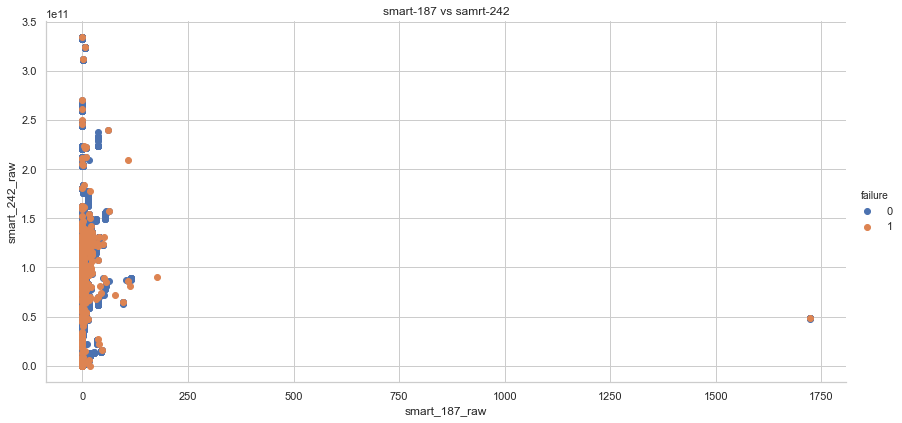

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_187_raw','smart_242_raw').add_legend()
plt.title('smart-187 vs samrt-242')
plt.show()

### SMART- 188

### smart-188 vs smart-193

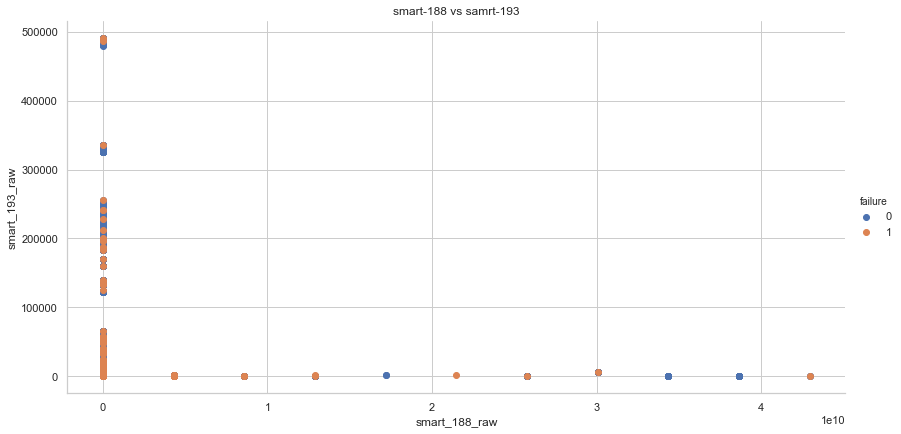

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_188_raw','smart_193_raw').add_legend()
plt.title('smart-188 vs samrt-193')
plt.show()

### smart-188 vs smart-194

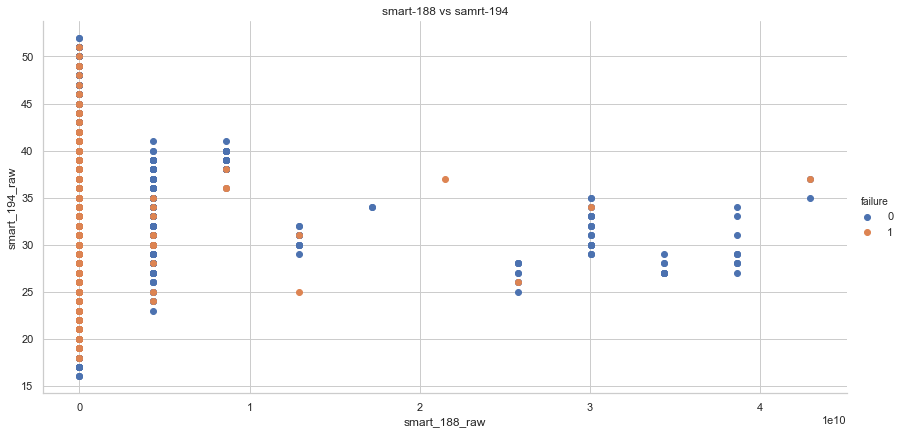

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_188_raw','smart_194_raw').add_legend()
plt.title('smart-188 vs samrt-194')
plt.show()

### smart-188 vs smart-197

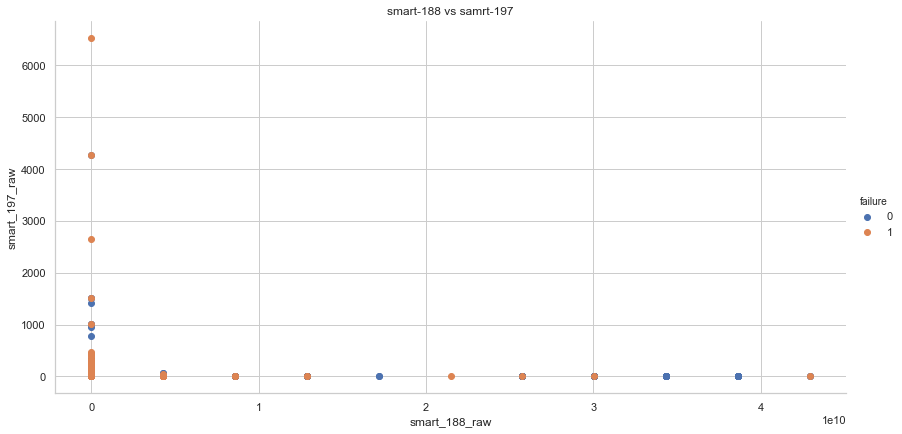

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_188_raw','smart_197_raw').add_legend()
plt.title('smart-188 vs samrt-197')
plt.show()

### smart-188 vs smart-198

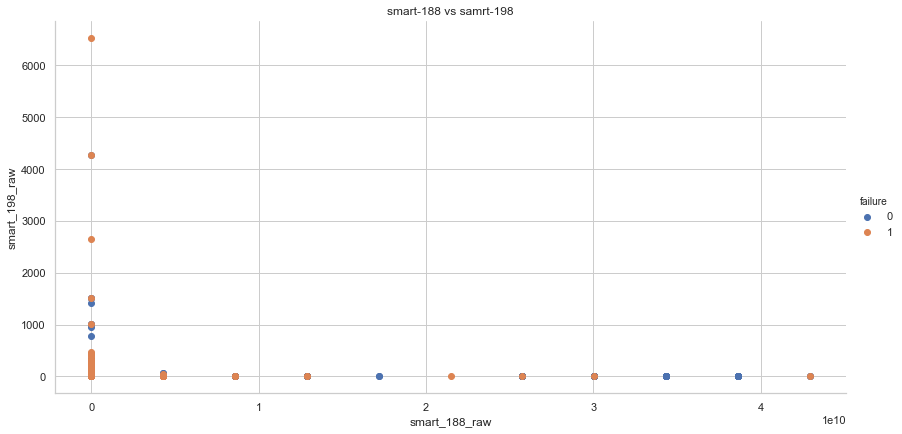

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_188_raw','smart_198_raw').add_legend()
plt.title('smart-188 vs samrt-198')
plt.show()

### smart-188 vs smart-241

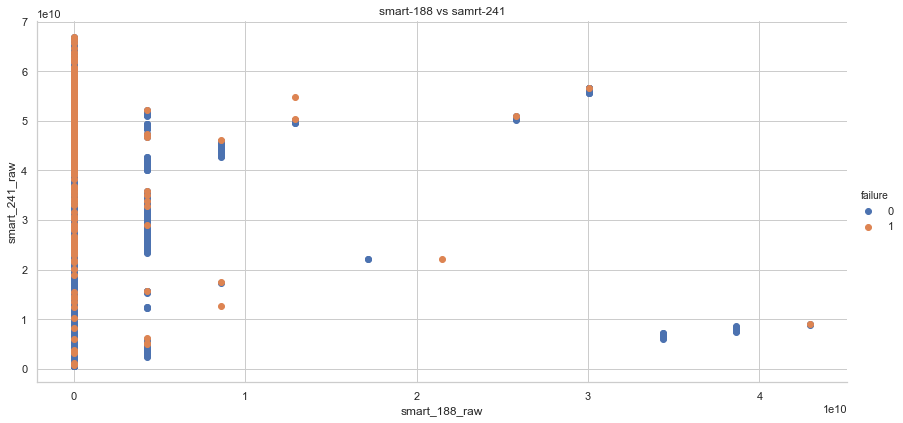

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_188_raw','smart_241_raw').add_legend()
plt.title('smart-188 vs samrt-241')
plt.show()

### smart-188 vs smart-242

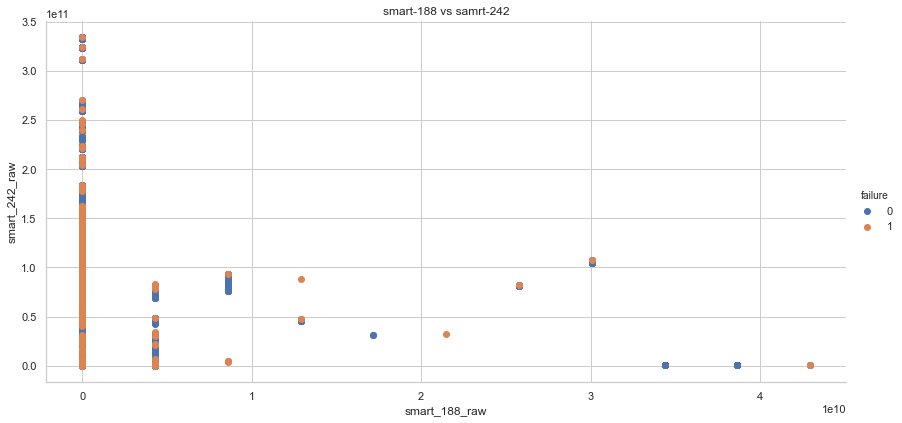

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_188_raw','smart_242_raw').add_legend()
plt.title('smart-188 vs samrt-242')
plt.show()

### SMART-193

### smart-193 vs smart-194

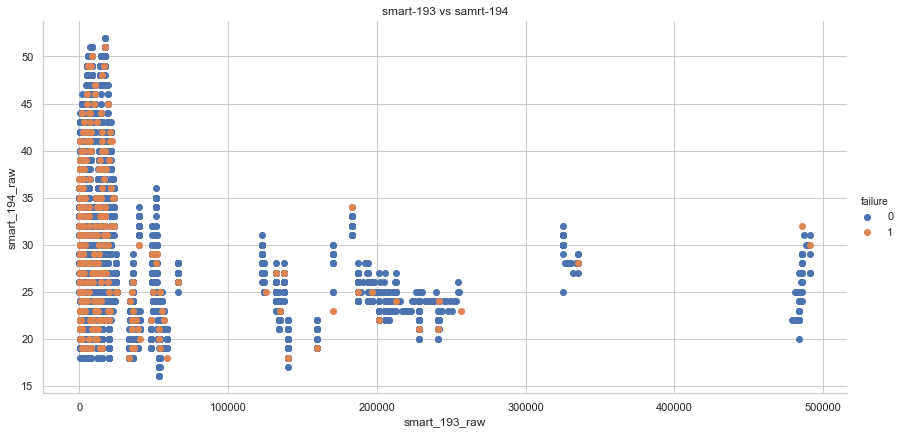

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_193_raw','smart_194_raw').add_legend()
plt.title('smart-193 vs samrt-194')
plt.show()

### smart-193 vs smart-197

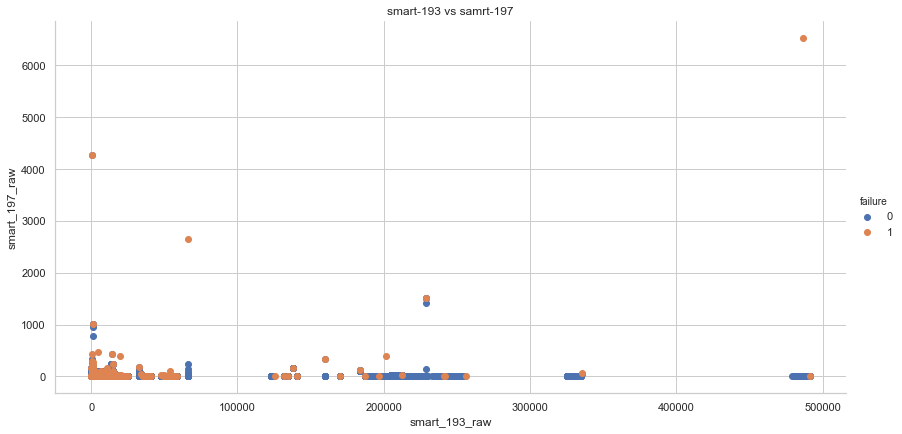

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_193_raw','smart_197_raw').add_legend()
plt.title('smart-193 vs samrt-197')
plt.show()

### smart-193 vs smart-198

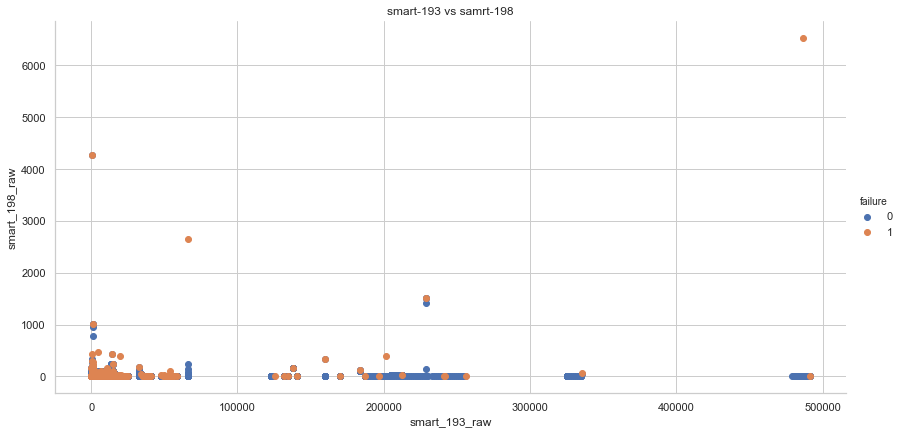

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_193_raw','smart_198_raw').add_legend()
plt.title('smart-193 vs samrt-198')
plt.show()

### smart-193 vs smart-241

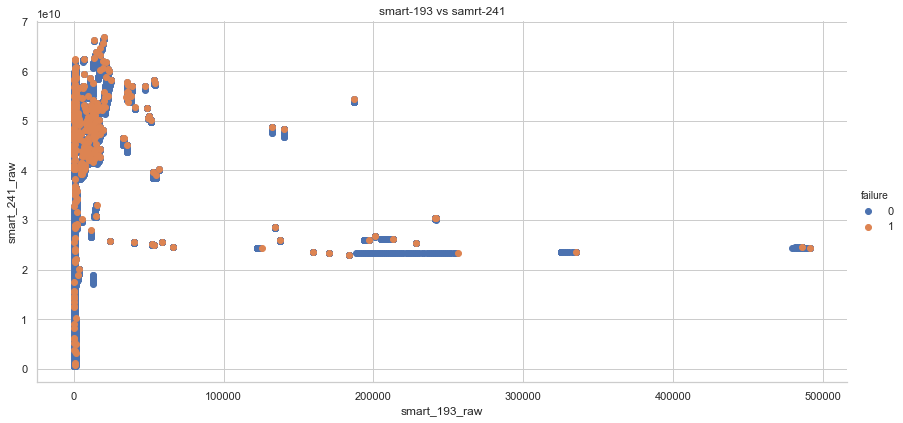

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_193_raw','smart_241_raw').add_legend()
plt.title('smart-193 vs samrt-241')
plt.show()

### smart-193 vs smart-242

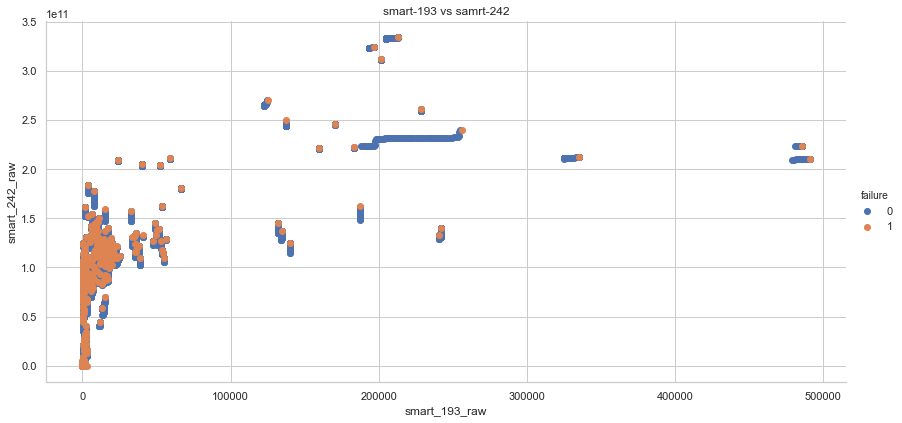

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_193_raw','smart_242_raw').add_legend()
plt.title('smart-193 vs samrt-242')
plt.show()

### SMART- 194

### smart-194 vs smart-197

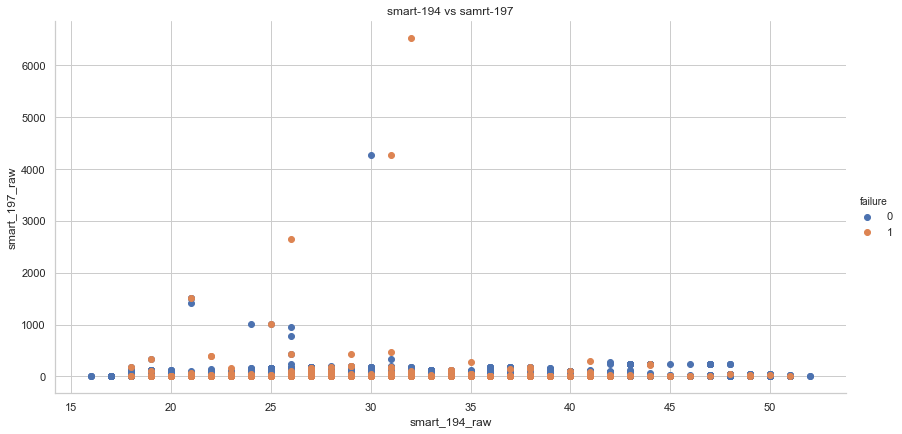

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_194_raw','smart_197_raw').add_legend()
plt.title('smart-194 vs samrt-197')
plt.show()

### smart-194 vs smart-194

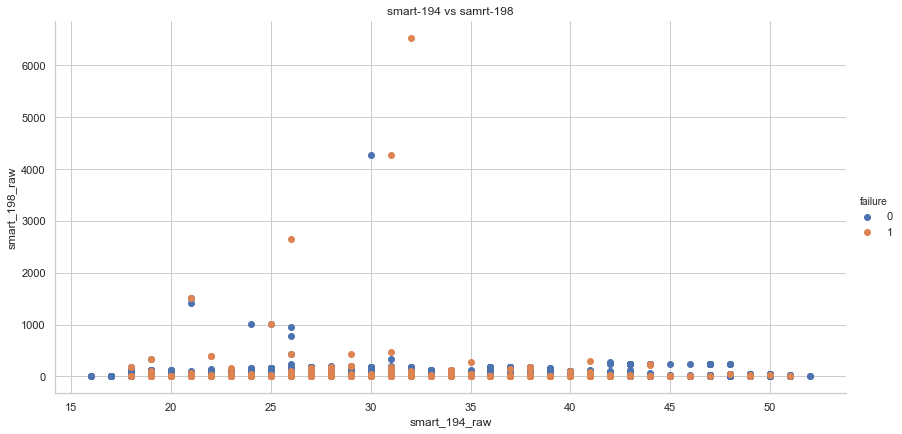

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_194_raw','smart_198_raw').add_legend()
plt.title('smart-194 vs samrt-198')
plt.show()

### smart-194 vs smart-241

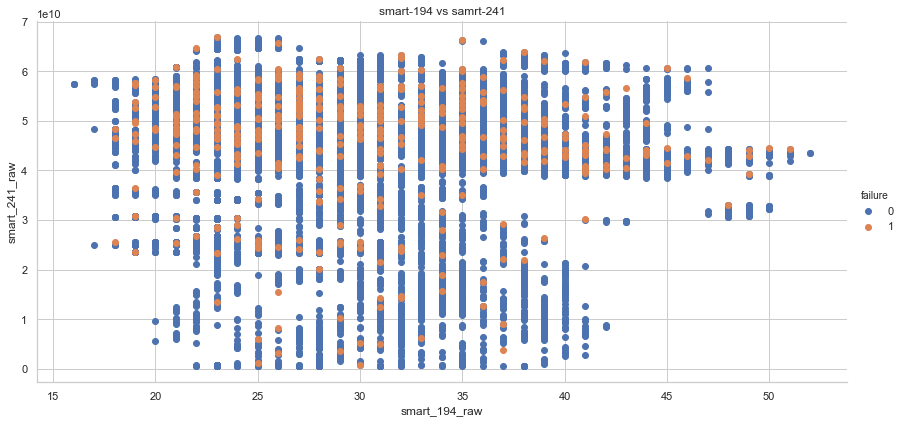

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_194_raw','smart_241_raw').add_legend()
plt.title('smart-194 vs samrt-241')
plt.show()

### smart-194 vs smart-242

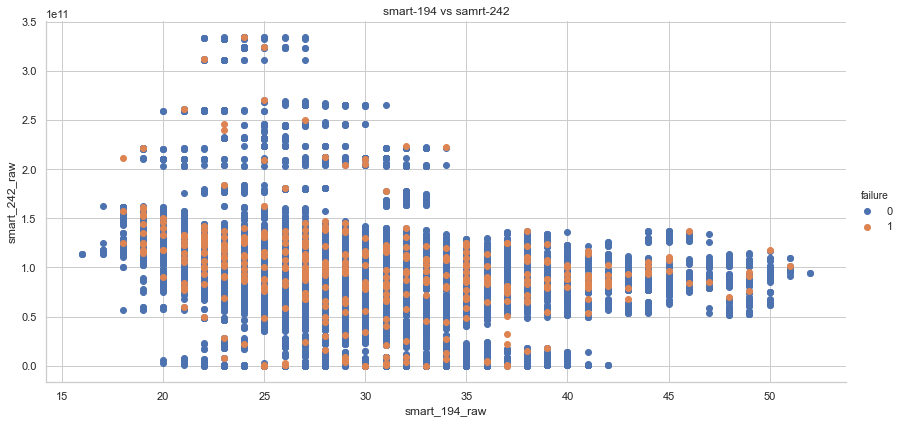

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_194_raw','smart_242_raw').add_legend()
plt.title('smart-194 vs samrt-242')
plt.show()

### SMART- 197

### smart-197 vs smart-198

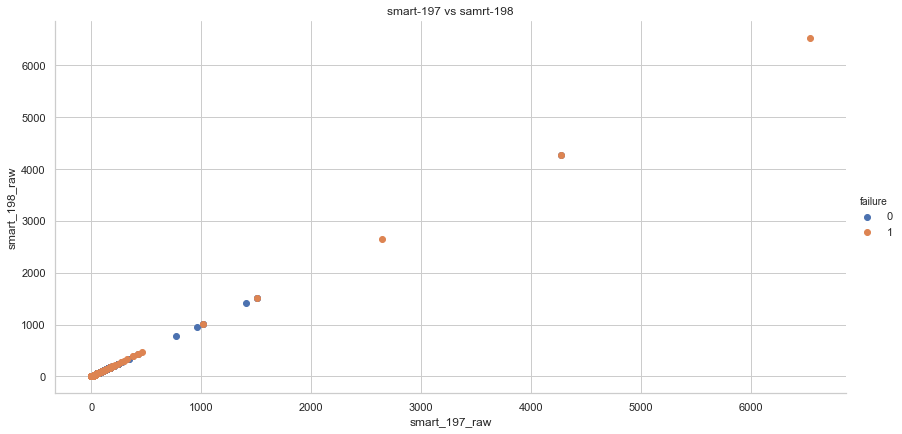

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_197_raw','smart_198_raw').add_legend()
plt.title('smart-197 vs samrt-198')
plt.show()

### smart-197 vs smart-241

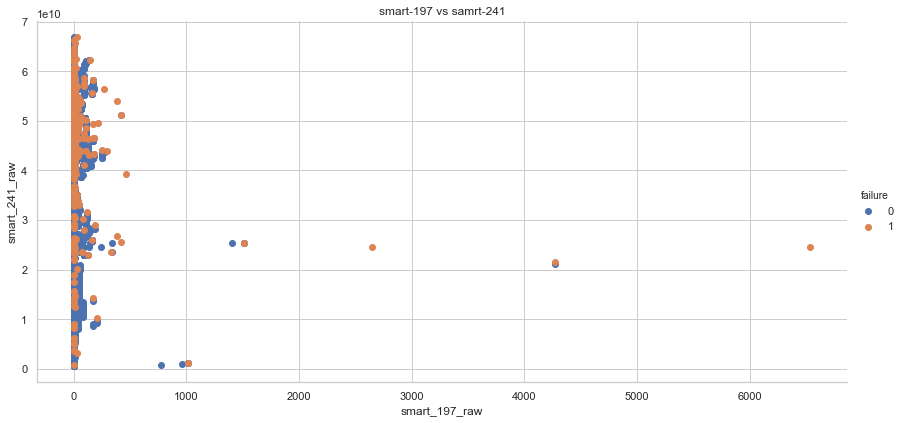

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_197_raw','smart_241_raw').add_legend()
plt.title('smart-197 vs samrt-241')
plt.show()

### smart-197 vs smart-242

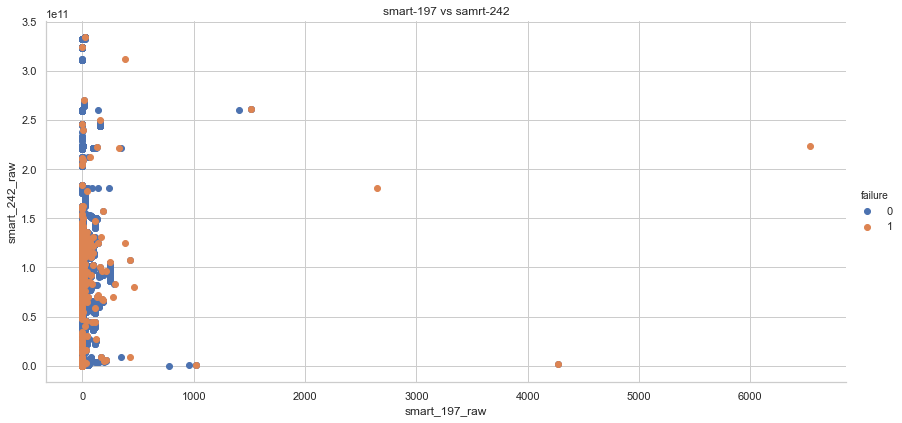

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_197_raw','smart_242_raw').add_legend()
plt.title('smart-197 vs samrt-242')
plt.show()

### SMART- 198

### smart-198 vs smart-241

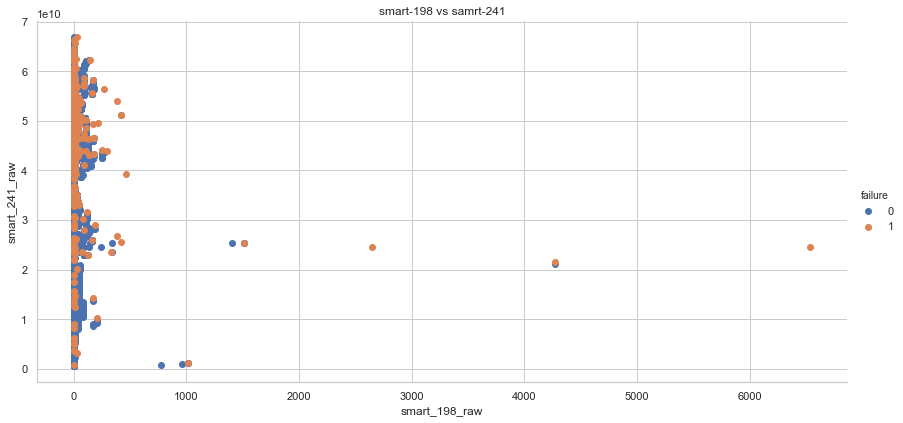

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_198_raw','smart_241_raw').add_legend()
plt.title('smart-198 vs samrt-241')
plt.show()

### smart-198 vs smart-242

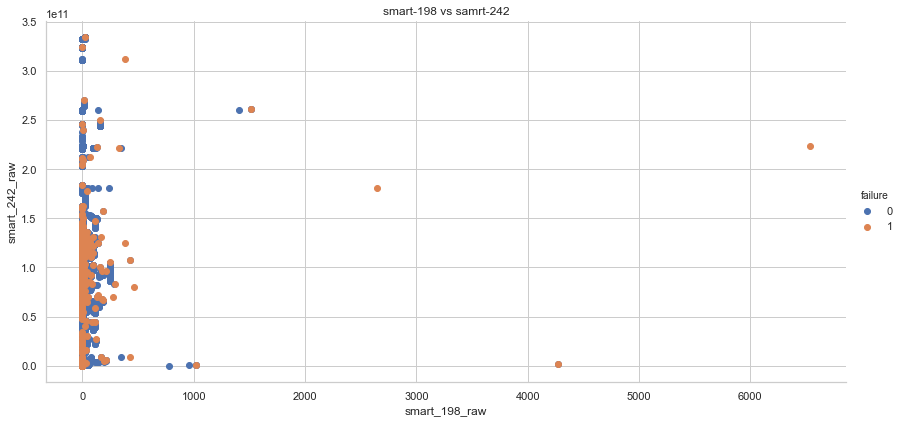

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_198_raw','smart_242_raw').add_legend()
plt.title('smart-198 vs samrt-242')
plt.show()

### SMART- 241

### smart-241 vs smart-242

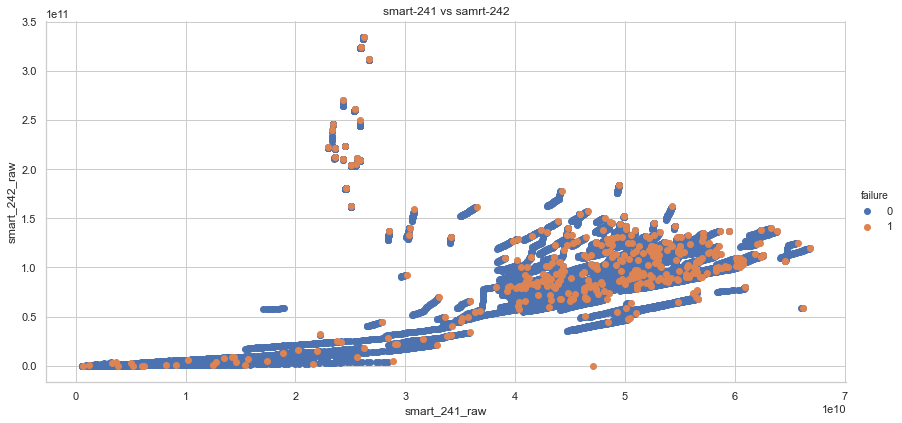

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df_main, hue='failure',height=6,aspect=2) \
.map(plt.scatter,'smart_241_raw','smart_242_raw').add_legend()
plt.title('smart-241 vs samrt-242')
plt.show()

### From the above Multivariate analysis, we hardly find any relation between the features, all the variable are jumble(overlapping) with each other.

# Observation and Conclusion:

### 1. The dataset is highly imbalance containing 7.4 million variables. The class label "failure" of the dataset is binary classification containing '0' and '1'. There are only 387 datapoints assign to class-1 and rest are class-0.

### 2. The dataset contains 130 columns, by the domain knowledge we only include the useful features(columns) to the dataset, the dataset get comprise by 15 columns.

### 3. The hard drive that got failed have been appeared in dataset 17,179 times. So we will use this variables to analyze.

### 4. For Univariate analysis we use distribution plot to look over the features, but did not find any proper separation between the failure and working hard drive.

### 5. For Multivariate analysis we use pair plot and then use scatter plot to observe each features with other, but did not find any proper relation between them. All the variables are overlapping with each other and there is no proper linear separation between them.



# Performance metrics:
#### As the dataset is highly imbalance, so we will use:

#### 1. Confusion matrix: from confusion matrix we can get TPR, FPR, Precision, Recall, F-1 score and AUC score.

#### 2. Precision: tells about classifier correctly identify disk at risks.

#### 3. Recall: it will tell classifier to capture all replaced disks, like higher recall means low false negatives(i.e., the number of disks labeled as healthy when they were replaced)

#### 4. AUC score: it will tells about the defect(high TPR and low FPR).

#### 5. F-1 score:  it will give a combined score of precision and recall in weighted harmonic mean